In [16]:
from feature_extraction import *
from nice_plots import *
from collections import Counter
import time
from supervised_funcs import *

# EDA & preproc

## Collected data

In [17]:
data = pd.read_csv("data3.csv")
data

xAcc  yAcc  zAcc  xGyro  yGyro  zGyro  label
0      6.99 -0.57 -7.28  -2.75  -3.23   2.62   fall
1      6.51 -0.75 -6.93  -0.67  -6.35   4.64   fall
2      6.22 -0.63 -6.73   0.79  -5.49   3.85   fall
3      6.34 -0.62 -6.80   1.59  -2.26   0.67   fall
4      6.49 -0.39 -6.60   0.67  -0.24  -1.10   fall
...     ...   ...   ...    ...    ...    ...    ...
96795  7.30 -1.16 -4.58  18.19   3.60 -35.77  light
96796  7.39 -0.37 -5.05  20.08   0.06 -34.55  light
96797  7.52 -1.46 -5.82  22.58   0.12 -28.02  light
96798  7.58 -2.14 -6.31  19.47   2.44 -22.52  light
96799  7.56 -1.90 -5.89  15.56   3.91 -19.23  light

[96800 rows x 7 columns]

## Explicit preprocessing

In [18]:
flat_data = flatten_ts(data)
flat_data

xAcc_1  xAcc_2  xAcc_3  xAcc_4  xAcc_5  xAcc_6  xAcc_7  xAcc_8  xAcc_9  \
0      6.99    6.51    6.22    6.34    6.49    6.55    6.27    6.67    6.79   
1      6.89    6.61    6.48    6.45    6.75    6.90    6.70    6.55    6.47   
2      5.92    5.89    5.83    5.89    5.94    5.90    5.79    5.88    6.02   
3      6.88    6.49    6.41    6.09    5.62    5.67    7.41   12.76    7.47   
4      6.56    6.12    6.17    6.41    6.35    5.88    5.36    5.16   12.62   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
237    6.59    6.94    7.21    6.72    6.58    6.51    6.77    8.18   10.87   
238    6.86    6.81    6.63    6.60    6.41    7.32    9.05    9.84    8.77   
239    6.78    8.19    7.49    7.53    6.69    8.30    8.30    7.21    6.68   
240    8.42    8.20    7.70    8.13    8.70    8.70    8.16    7.48    7.65   
241   11.33   11.85    8.37    7.95    6.83    8.30    9.00    8.71    8.64   

     xAcc_10  ...  zGyro_392  zGyro_393  zGyro_394  zGyro_395  zGyro_396  \
0       6.72  ...      -0.67      -1.10      -1.34      -1.28      -1.04   
1       6.64  ...      -0.43      -0.73      -0.85      -1.04      -1.04   
2       5.98  ...      22.77      23.86      26.43      34.36      39.92   
3       6.55  ...       0.06       3.05       1.46      -3.05      -3.78   
4       9.95  ...     -16.78     -24.23     -29.91     -28.75     -20.26   
..       ...  ...        ...        ...        ...        ...        ...   
237     8.51  ...      -6.47      -1.59       4.27      -4.70     -15.20   
238     7.39  ...     -14.71     -22.28     -26.18     -31.07     -37.66   
239     6.70  ...      16.24      18.68      18.80      18.31      14.28   
240     7.78  ...      -7.08     -10.86     -10.62      -5.62       1.71   
241     8.29  ...     -53.59     -46.45     -32.90     -32.04     -35.77   

     zGyro_397  zGyro_398  zGyro_399  zGyro_400  label  
0        -0.98      -0.98      -0.98      -1.10   fall  
1        -1.34      -0.79      -0.92      -0.67   fall  
2        39.67      37.78      38.09      36.19   fall  
3        -4.94      -4.21      -2.56       1.40   fall  
4        -9.89      -9.58     -18.62     -35.58   fall  
..         ...        ...        ...        ...    ...  
237     -17.40     -12.88     -16.66     -23.13  light  
238     -48.46     -50.66     -35.52     -21.06  light  
239       5.86       4.33      15.14      24.60  light  
240      11.35      15.69      18.62      22.95  light  
241     -34.55     -28.02     -22.52     -19.23  light  

[242 rows x 2401 columns]

In [4]:
warnings.filterwarnings('ignore')
df, labels = vec_sum(flat_data)
df["label"] = labels
df

acc_1      acc_2     acc_3      acc_4      acc_5      acc_6  \
0    10.108581   9.537688  9.185761   9.317725   9.264567   9.625679   
1     9.642505   9.398622  9.307653   9.317312   9.578157   9.677939   
2     9.661987   9.639725  9.577270   9.591632   9.661698   9.597072   
3     9.480295   8.876773  8.682062   8.864181   8.687900   8.705142   
4     9.567241   9.223112  9.656159   9.535397   9.125322   8.799966   
..         ...        ...       ...        ...        ...        ...   
237   9.170093   9.273748  9.343463   9.500316   9.085670   9.075230   
238   9.022505   9.271451  9.181166   9.263369   9.303322   9.903297   
239   7.912073   9.007675  8.720384  10.116961   9.617723  10.637171   
240   9.129847   8.806730  9.078882  10.509943  10.325803   9.800066   
241  13.416777  16.330003  9.662784   8.894633   7.116361   9.988824   

         acc_7      acc_8      acc_9     acc_10  ...    gyr_392    gyr_393  \
0     9.470449   9.866560   9.931556   9.772226  ...   0.832226   1.108152   
1     9.672518   9.602609   9.526610   9.640954  ...   0.755910   1.080139   
2     9.501800   9.647844   9.755275   9.684782  ...  36.741091  35.978113   
3     9.638350  17.116331  10.001335   8.002706  ...   5.678010   9.178181   
4     8.890231   9.637935  15.429051  11.867860  ...  25.946726  28.139966   
..         ...        ...        ...        ...  ...        ...        ...   
237   9.275139  11.338188  12.609592  10.298942  ...  24.157347  14.040239   
238  11.889706  12.140906  10.008227   8.930291  ...  16.680126  22.309641   
239  10.104375   9.309882   9.280781   9.631895  ...  27.804604  30.426965   
240   9.796203   9.374711   9.540325   9.469789  ...  14.292617  14.283893   
241  10.654731  10.047099   9.744681   9.732430  ...  81.621294  65.225264   

       gyr_394    gyr_395    gyr_396    gyr_397    gyr_398    gyr_399  \
0     1.508940   1.350296   1.384558   1.316586   1.062873   0.996393   
1     1.166619   1.393198   1.229349   1.508575   1.302728   1.196746   
2    39.397108  45.323665  50.354353  51.365726  49.815388  50.785400   
3     9.709485   7.585269   6.007537   6.188667   5.522871   6.093423   
4    31.458948  28.856559  20.350327   9.901773  10.485676  20.769095   
..         ...        ...        ...        ...        ...        ...   
237   4.396464  12.434846  38.257195  49.500611  52.183440  56.153815   
238  26.740989  36.154228  52.353129  67.389355  65.728835  38.954941   
239  30.604902  30.377567  24.071066   8.991780   5.798396  17.283695   
240  12.658535   6.578982   7.462721  15.174574  18.183570  21.144408   
241  43.480535  38.409363  40.290557  39.961388  35.985986  29.869464   

       gyr_400  label  
0     1.218113   fall  
1     1.042785   fall  
2    42.545700   fall  
3    10.975719   fall  
4    45.044041   fall  
..         ...    ...  
237  51.446970  light  
238  21.060769  light  
239  27.881836  light  
240  29.404588  light  
241  25.043854  light  

[242 rows x 801 columns]

## Plotting time

Random samples of accelerometer and gyroscope signals for each class


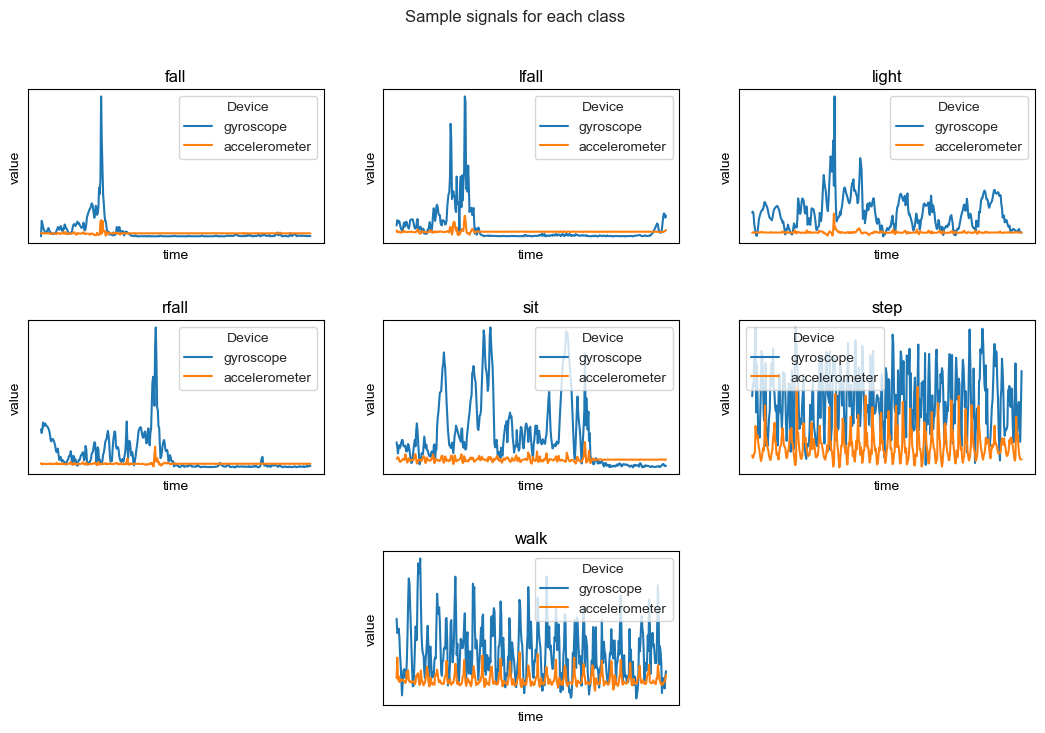

In [5]:
# Select one row for each different label class
sampled_rows = df.groupby('label').apply(lambda x: x.sample(1, random_state=123))

signal_plot(sampled_rows)

### FFT Magnitude

Now plot the squared magnitude as a measure of energy distribution over the frequencies for the corresponding signals.

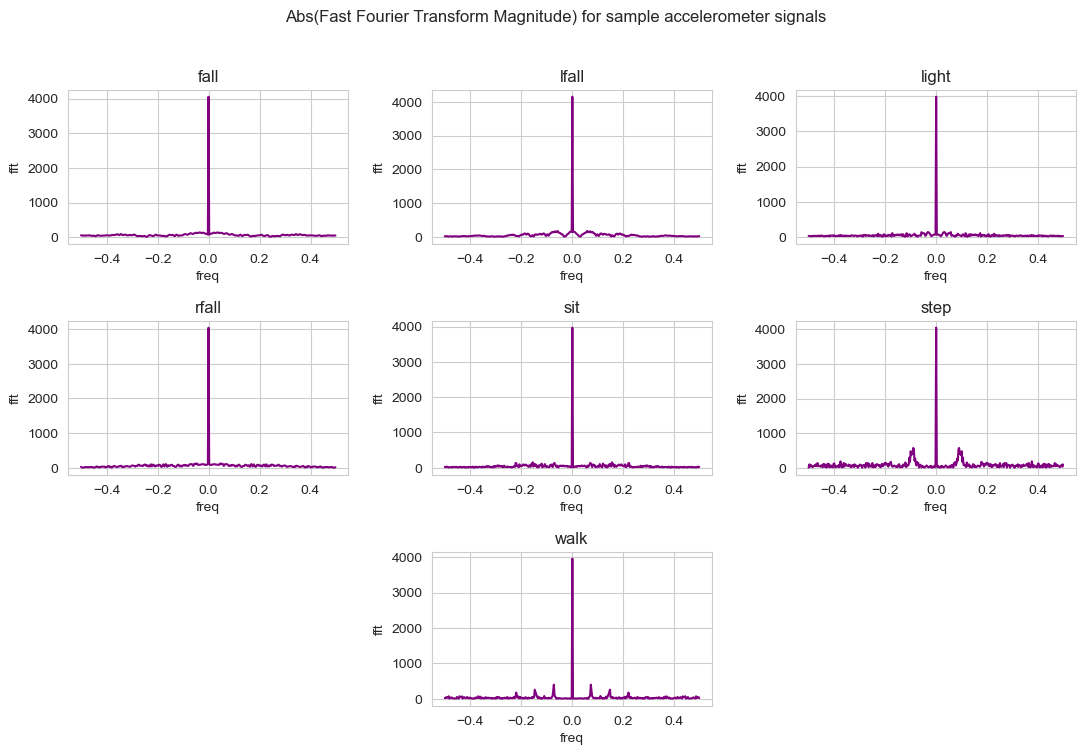

In [6]:
fft_plot(sampled_rows, "accelerometer")

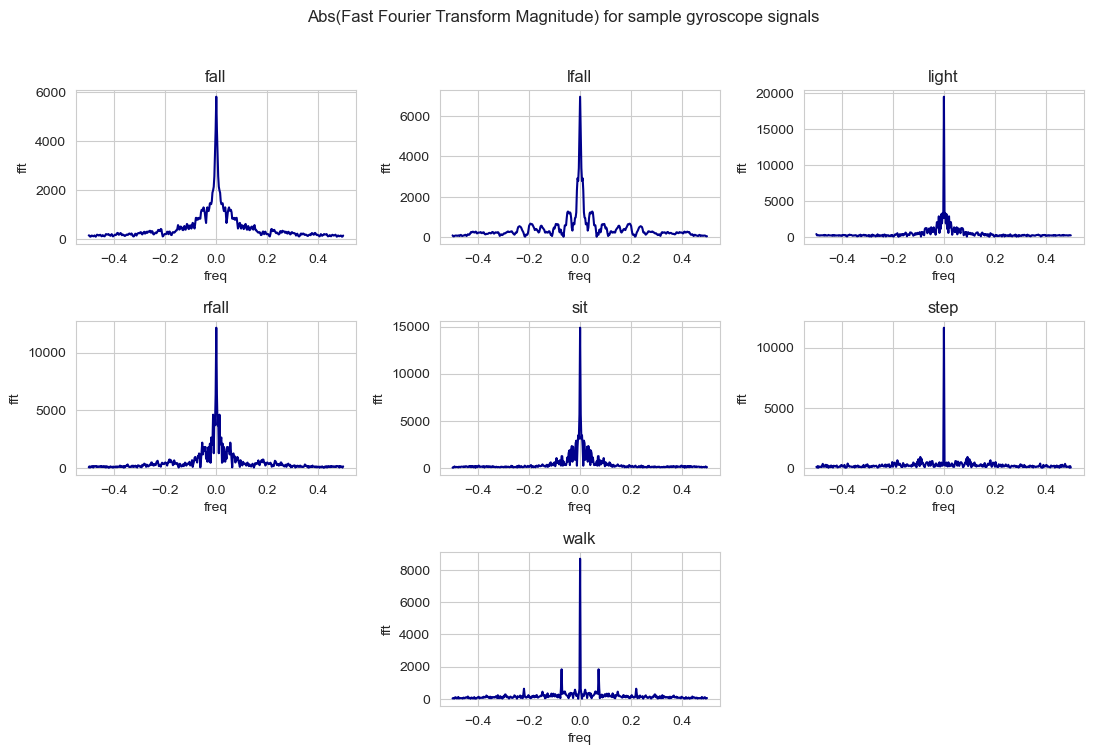

In [7]:
fft_plot(sampled_rows, "gyroscope")

### Power spectrum peaks

The strategy then will be to select the more informative frequencies based on the magnitude peaks that we found in the previous representations (we apply a low-pass filter)

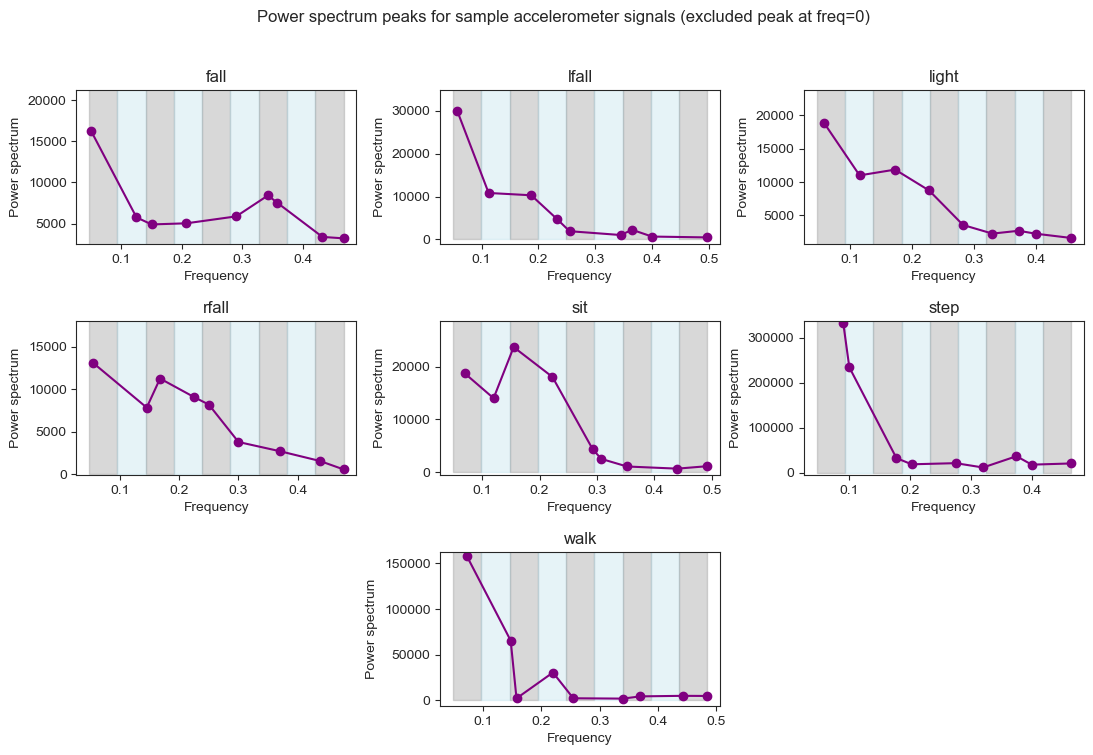

In [8]:
maxbin_plot(sampled_rows, "accelerometer")

Note that for the accelerometer the magnitude at frequence=0 is the same for each type of signal. This is not true for the gyroscope since it seems that for every signal has a peak at freq=0 BUT this peak has different magnitude in each case

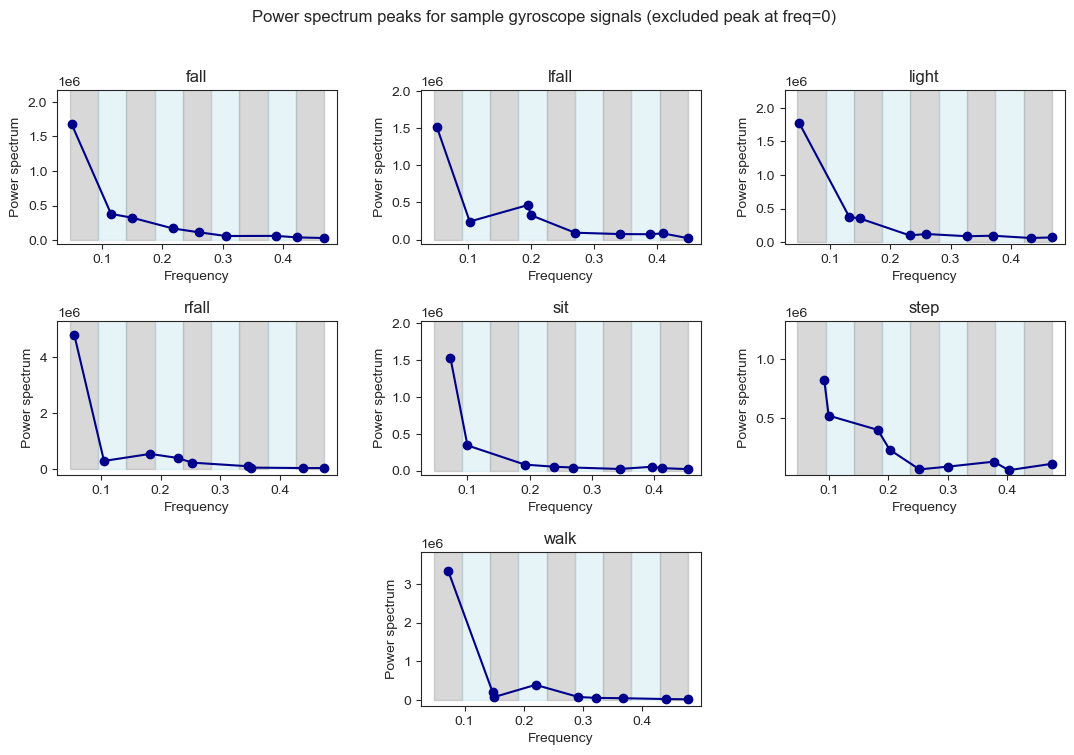

In [9]:
maxbin_plot(sampled_rows, "gyroscope")

### Wavelet coefficients

The algorithm for the extraction of the feature "CWD coeff":

>- from an online data set of real falls (not simulated by us) we extract the profile of
signal peaks (of accelerometers) in a two-second window;
>- from the above peaks we derive an average peak (an average signal lasting two seconds)
that will represent our fall benchmark;
>- we approximate this last average discrete signal to a ”continuous” curve (specifically
to a Morlet wavelet) by constructing a ”mother wavelet.”
>- finally we cycle over each of our signals, identify a peak for that signal, and compare
the trend of that peak to our mother wavelet via a similarity measure

Given $SV(t)$ the digital signal corresponding to the two-second window of a "candidate peak" detected by running along a timeseries of the accelerometer sum signal. Given $\Phi_{fall}$ the mother wavelet as defined above. The following coefficient estimate the similarity of the candidate window with the mother wavelet and with scaled and translated versions of it:

$$CWTcoeff(a,b) = \frac{1}{\sqrt{a}} \int_{-\infty}^{+\infty} SV_{candidate}(t) \cdot \Phi_{fall} \left( \frac{t-b}{a} \right) dt$$


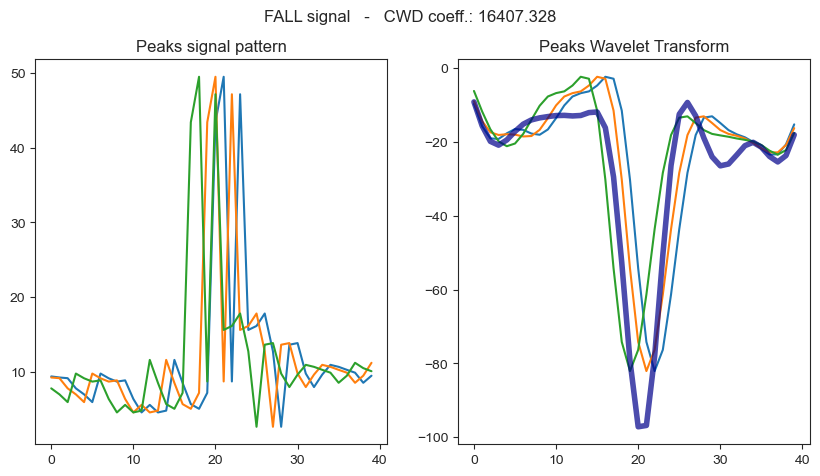

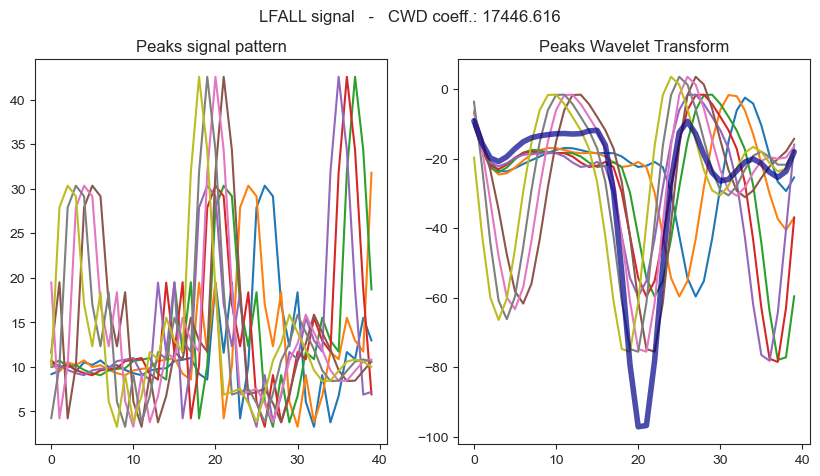

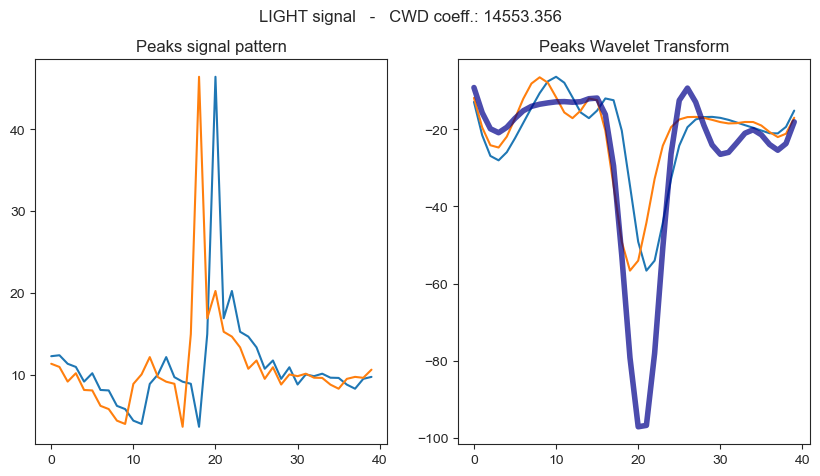

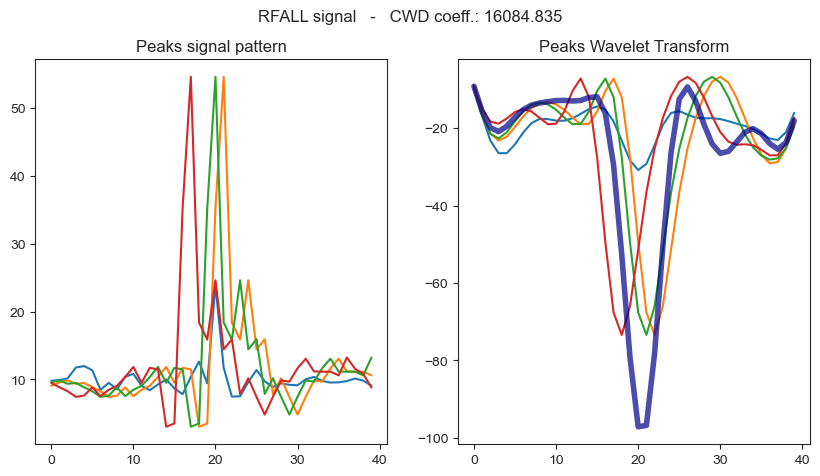

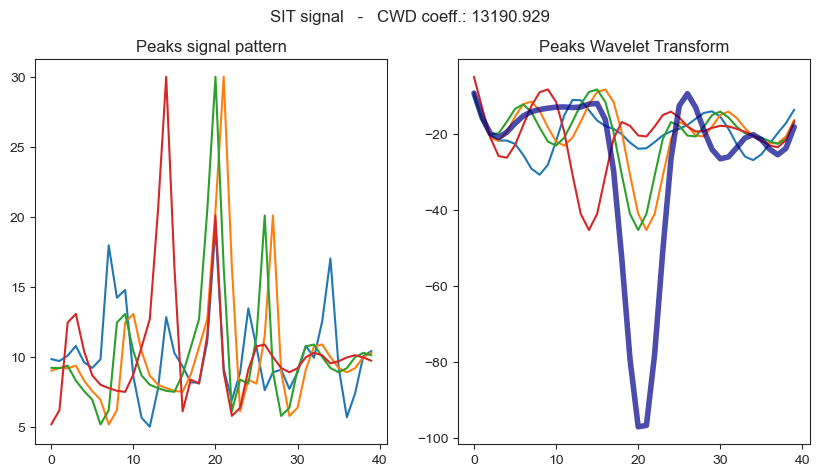

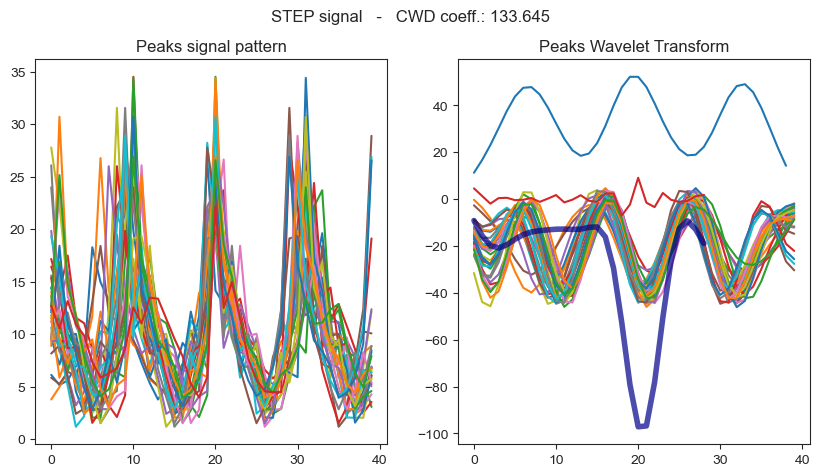

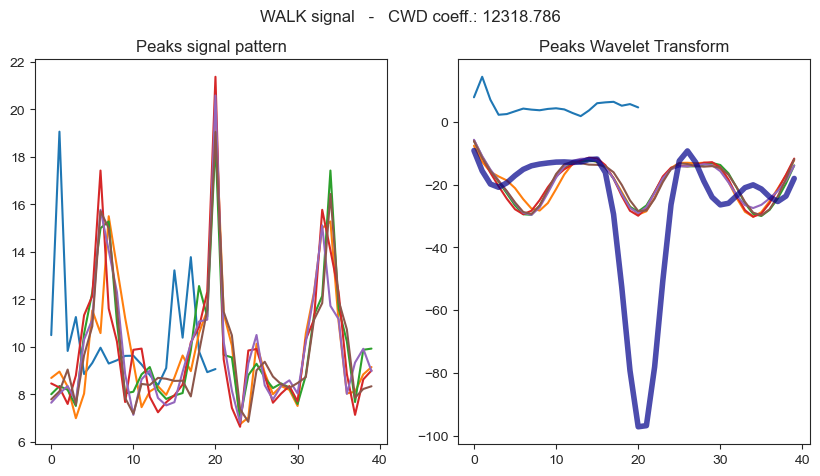

In [10]:
mother_wave = extract_wave_df("file_csv")

for label, row in sampled_rows.iterrows():
    vec = np.array(row[:-1], dtype=np.float32)[:400]
    res = peakes_wavelet_approx(vec, mother_wave, True, label[0])

## Final preprocessed data set

In [4]:
df = preproc(data, 15)
df

acc_max_mag_1  acc_max_mag_2  acc_max_mag_3  acc_max_mag_4  \
0     1.679561e+07   18721.154353    7100.335747   15443.379045   
1     1.666644e+07   17096.038339    5345.825318   22126.371544   
2     1.690417e+07   22413.999497   14913.810039   18483.969593   
3     1.690057e+07   18798.728822   27834.293492   58377.754093   
4     1.742747e+07   17572.669139   99254.848523  124734.902539   
..             ...            ...            ...            ...   
237   1.638037e+07   20099.923295    7037.623252   11433.622947   
238   1.660464e+07   15692.281489   14302.864306   19305.212301   
239   1.612340e+07   25131.303791   14680.610706    5905.058076   
240   1.613424e+07   11934.645653    6998.180669    9199.815170   
241   1.612441e+07   14374.495176    6303.048657   10604.946048   

     acc_max_mag_5  gyr_max_mag_1  gyr_max_mag_2  gyr_max_mag_3  \
0     11696.480495   1.077492e+08   5.017116e+06   6.787773e+05   
1     16797.181146   2.970916e+08   5.963252e+06   1.876670e+06   
2     13990.673765   4.304287e+08   8.412478e+06   1.644419e+06   
3     30326.288200   5.162937e+08   9.091154e+06   1.965535e+06   
4     34418.850456   3.574267e+08   3.717381e+06   2.053406e+06   
..             ...            ...            ...            ...   
237    7151.947063   3.005802e+08   1.076573e+07   3.910192e+06   
238    4545.408630   3.665159e+08   5.740845e+06   1.563710e+06   
239    7903.859218   2.961041e+08   5.159878e+06   1.533535e+06   
240   15515.727474   4.060575e+08   3.279267e+06   1.497185e+06   
241   15506.834508   3.726863e+08   4.103459e+06   1.755933e+06   

     gyr_max_mag_4  gyr_max_mag_5   acc_psd1   acc_psd2  acc_psd3    gyr_psd1  \
0     2.100723e+05  511951.143950   7.264484  21.605317  2.266248  335.528281   
1     6.657685e+05  465629.751594   9.428514  19.359462  1.741056  525.734259   
2     7.335214e+05  671668.798449  11.073100  25.433874  1.874920  296.404199   
3     6.057332e+05  683876.245125   9.131326  26.921273  3.127359  348.643022   
4     1.452541e+06  843492.824657  12.425194  31.434656  6.207779  668.548802   
..             ...            ...        ...        ...       ...         ...   
237   7.194042e+05  389663.003137   6.840570  15.026079  2.081657  153.232435   
238   5.912486e+05  565309.135195   5.550793  11.241446  2.417584  227.597167   
239   1.211368e+06  795695.965727  10.788574  15.292856  2.242325  238.547673   
240   1.246336e+06  217021.252937   3.716582  11.827115  2.076557  203.839857   
241   8.403789e+05  171644.710005  13.700544  11.411130  2.125187  193.857765   

        gyr_psd2   gyr_psd3     cwt_coeff  label  
0    6683.819118  10.060861  17895.547497   fall  
1    8445.535938  12.842785  16992.656384   fall  
2    6752.523845   8.763110  16037.018822   fall  
3    8965.268444  10.819895  12731.303696   fall  
4    6688.750331   9.785420  15162.129894   fall  
..           ...        ...           ...    ...  
237  4807.971407   5.426481  16233.858823  light  
238  5924.778843   5.529446  12721.569249  light  
239  5273.231796   5.532851  16415.380260  light  
240  4587.081041   8.481311  15761.040305  light  
241  4004.127298   7.792944  12275.192805  light  

[242 rows x 18 columns]

In [9]:
df.columns

Index(['acc_max_mag_1', 'acc_max_mag_2', 'acc_max_mag_3', 'acc_max_mag_4',
       'acc_max_mag_5', 'gyr_max_mag_1', 'gyr_max_mag_2', 'gyr_max_mag_3',
       'gyr_max_mag_4', 'gyr_max_mag_5', 'acc_psd1', 'acc_psd2', 'acc_psd3',
       'gyr_psd1', 'gyr_psd2', 'gyr_psd3', 'cwt_coeff', 'label'],
      dtype='object')

In [5]:
labels = df["label"]
df_binary = df.copy()
df_new = df.copy()
df = df.drop("label", axis=1)

# Binary classification

Since we want to perform a binary classification, we have to map our seven classes onto two classes ("fall" or "normal"). Then we split the dataset into X_train and X_test set and the output vector into y_train and y_test. Then, we scale the the input matrix both in the train and test sets.

In [6]:
# Mapping for relabeling
label_mapping = {
    'fall' :'fall',
    'rfall': 'fall',
    'lfall': 'fall',
    'light': 'fall',
    'sit': 'normal',
    'walk': 'normal',
    'step': 'normal'
}

# Replace existing labels with new labels
df_binary['label'] = df_binary['label'].map(label_mapping)
y = df_binary["label"]
df_binary = df_binary.drop("label", axis=1)

# split data 
seed = 1218
X_train, X_test, y_train, y_test = train_test_split(df_binary, y, test_size=0.3, random_state=seed)

# scale the features (may be useful if we are going to add other features with different scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

## Naive Bayes vs Logistic regression

In this section, we compare the performance of two models belonging to two different categories of machine learning models: discriminative and generative.
In brief, discriminative models target either to model $p(y|x)$ directly (i.e. as logistic regression does), or to learn a direct map from the inputs to the class variable (i.e. as perceptron does).
Generative models, on the other hand, try to model $p(x|y)$ and $p(y)$ (aka the likelihood and the prior distributions) and they make predictions by using the Bayes rule that allows to derive $p(y|x)$.


In this project, we compare the performance of logistic regression (representant of the discriminative category) and naive Bayes(representat of the generative category).
Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. 
Naive Bayes models assume the conditional independency of the predictors, a very strong assumption that may not be true. 
Since naive Bayes models raise additional assumptions w.r.t. the logistic regression, they should be treated as a quick-and-dirty baseline for a classification problem.
In the cases where we do not have particular constraints in terms of both time/resources and information (number of observation), we should prevent fromm using this type of models.

There are many flavours of naive Bayes models but, for our purposes, we focus our attention on the Gaussian naive Bayes model. 
In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution.
In order to fairly compare the performance of the naive Bayes and the logistic regression, we use a common procedure for the two models: a 10-fold cross validation with 10 repetitions.
This procedure allows us to obtain a more trustworthy accuracy measure.

We measure the accuracy of Gaussian naive bayes classifier using a reapeted K-fold cross validation.

In [132]:
# Prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=10,random_state=seed)
model = GaussianNB()
# Evaluate the model using cross-validation and accuracy scoring
scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# Calculate the mean of accuracy scores
mean_nb = scores.mean()
sd_nb = scores.std()
mean_nb

0.9727941176470588

Now, it is the turn of the logistic regression. Unlike naive Bayes, the logistic regression does not make any assumption on the distribution of the data. In fact, in the logistic regression we maximize the conditional likelihood of $Y$ given $X$ ,$Pr(Y|X)$, leaving unspecified the distribution of the inputs.
This implies that if the true class conditional distributions of data are Gaussian and conditionally independent given Y, the logistic regression will be asymptotically less efficient than naive Bayes.
Conversely, by making significantly weaker assumptions, logistic regression is more robust and less sensitive to incorrect modeling assumptions.

In [133]:
# Prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=10,random_state=seed)

# Create a logistic regression model
model = LogisticRegression()
# Evaluate the model using cross-validation and accuracy scoring
scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# Calculate the mean of accuracy scores
mean_lr = scores.mean()
sd_lr = scores.std()
mean_lr

0.9828676470588235

## Model comparison in binary classification

### The models

In [7]:
print("Logistic")
log_preds, log_clf, log_best_params = best_softmax_fit(X_train_scaled, X_test_scaled, y_train, y_test, binary=True)
print("*"*200)
print("Random Forest")
rf_preds, rf_clf, rf_best_params = best_rf_fit(X_train_scaled, X_test_scaled, y_train, y_test)
print("*"*200)
print("SVM")
svm_preds, svm_clf, svm_best_params = best_svm_fit(X_train_scaled, X_test_scaled, y_train, y_test)
print("*"*200)
print("XGBoost")
le = LabelEncoder()
le.fit(y_train.unique())
warnings.filterwarnings('ignore')
y_tr = le.transform(y_train)
y_te = le.transform(y_test)
xgb_preds, xgb_clf, xgb_best_params = best_xgboost_fit(X_train_scaled, X_test_scaled, y_tr, y_te, binary=True)
print("*"*200)
print("KNN")
knn_preds, knn_clf, knn_best_params = best_knn_fit(X_train_scaled, X_test_scaled, y_train, y_test)
print("*"*200)
print("Perceptron")
perc_preds, perc_clf, perc_best_params = best_perc_fit(X_train_scaled, X_test_scaled, y_train, y_test)
print("ADAboost")
ada_preds, ada_clf, ada_best_params = best_ada_fit(X_train_scaled, X_test_scaled, y_train, y_test)
print("*"*200)

Logistic
Best parameters: {'warm_start': False, 'solver': 'sag', 'penalty': None, 'max_iter': 250, 'fit_intercept': False, 'class_weight': 'balanced'}
Accuracy:1.0
F1-score:1.0
********************************************************************************************************************************************************************************************************
Random Forest
Best parameters: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'gini', 'bootstrap': True}
Accuracy:0.9863013698630136
F1-score:0.9862910798122064
********************************************************************************************************************************************************************************************************
SVM
Best parameters: {'shrinking': True, 'kernel': 'sigmoid', 'degree': 5, 'decision_function_shape': 'ovo', 'break_ties': False, 'C': 1}
Accuracy:0.958904109589041
F1-score:0.958904109589041
***************************************

In [ ]:
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df_binary)
principal_components = pca.fit_transform(data_standardized)

[16:33:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "multi_strategy" } are not used.



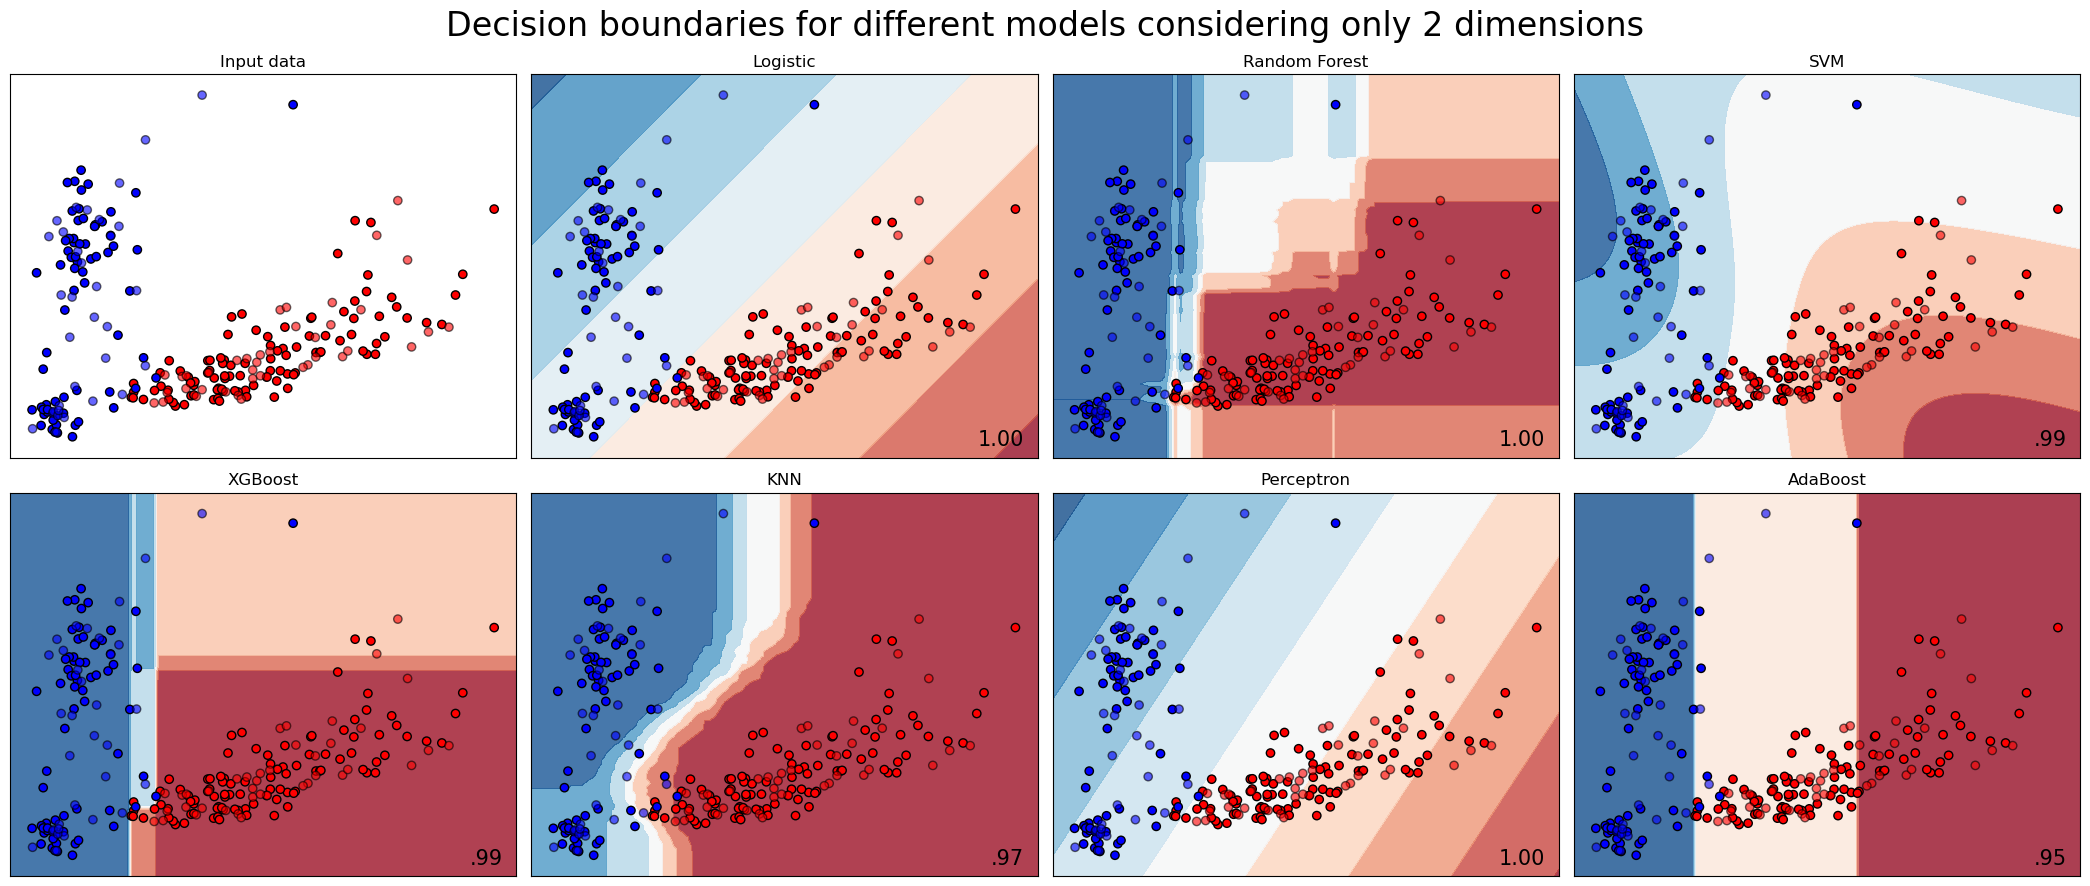

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline



names = [
    "Logistic",
    "Random Forest",
    "SVM",
    "XGBoost",
    "KNN",
    "Perceptron", 
    "AdaBoost"
]

classifiers = [
    LogisticRegression(**log_best_params),
    RandomForestClassifier(**rf_best_params),
    SVC(**svm_best_params),
    XGBClassifier(**xgb_best_params),
    KNeighborsClassifier(**knn_best_params),
    Perceptron(**perc_best_params),
    AdaBoostClassifier(**ada_best_params)
]

X = principal_components
y = y
rng = np.random.RandomState(2)

linearly_separable = (X, y)

datasets = [
    linearly_separable,
]

figure = plt.figure(figsize=(21, 9))  # Imposta la dimensione della figura
i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    label_encoder = LabelEncoder()

    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(2, 4, i)  # Imposta il numero totale di righe e colonne

    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(2, 4, i)  # Imposta il numero totale di righe e colonne

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.suptitle("Decision boundaries for different models considering only 2 dimensions", fontsize=24)
plt.tight_layout()
plt.show()

### Performance metrics

In [ ]:
clf_list = [
    (log_clf, log_preds, "Logistic"),
    (rf_clf, rf_preds, "Random Forest"),
    (svm_clf, svm_preds, "SVM"),
    (ada_clf, ada_preds, "ADAboost"),
    (knn_clf, knn_preds, "KNN")
]

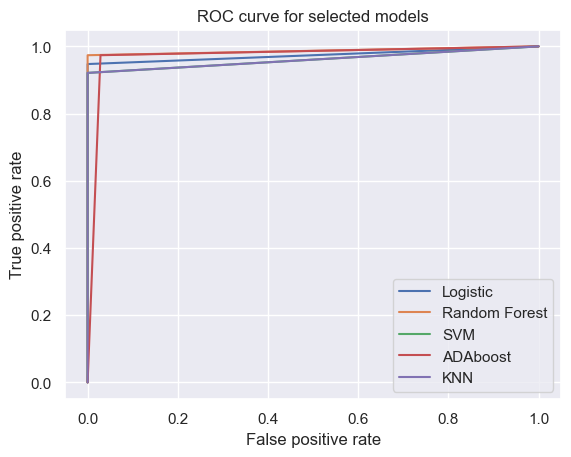

In [110]:
metrics = model_comparison(clf_list, X_test_scaled, y_te, le)

In [111]:
metrics = pd.DataFrame(metrics)
metrics

model    recall  precision  f1-score  accuracy   roc-auc
0       Logistic  0.973684   0.972973  0.972598  0.972603  0.973684
1  Random Forest  0.986842   0.986111  0.986291  0.986301  0.986842
2            SVM  0.960526   0.960526  0.958904  0.958904  0.960526
3       ADAboost  0.972556   0.972556  0.972556  0.972603  0.972556
4            KNN  0.960526   0.960526  0.958904  0.958904  0.960526

### Calibration curves for the binary classification

Well calibrated classifiers are probabilistic classifiers for which the output of predict_proba can be directly interpreted as a confidence level. For instance, a well calibrated (binary) classifier should classify the samples such that for the samples to which it gave a predict_proba value close to 0.8, approximately 80% actually belong to the positive class.

We will compare the calibration curves (also known as reliability diagrams) IN THIS SETUP:
>- using the above classifiers
>- fitting these classifiers on modified data set, reducing the problem to a binary classification (we collapse the labels in 2 classes)
>- using predicted probabilities of the test dataset.

Calibration curves are then created by binning predicted probabilities, then plotting the mean predicted probability in each bin against the observed frequency (fraction of positives).

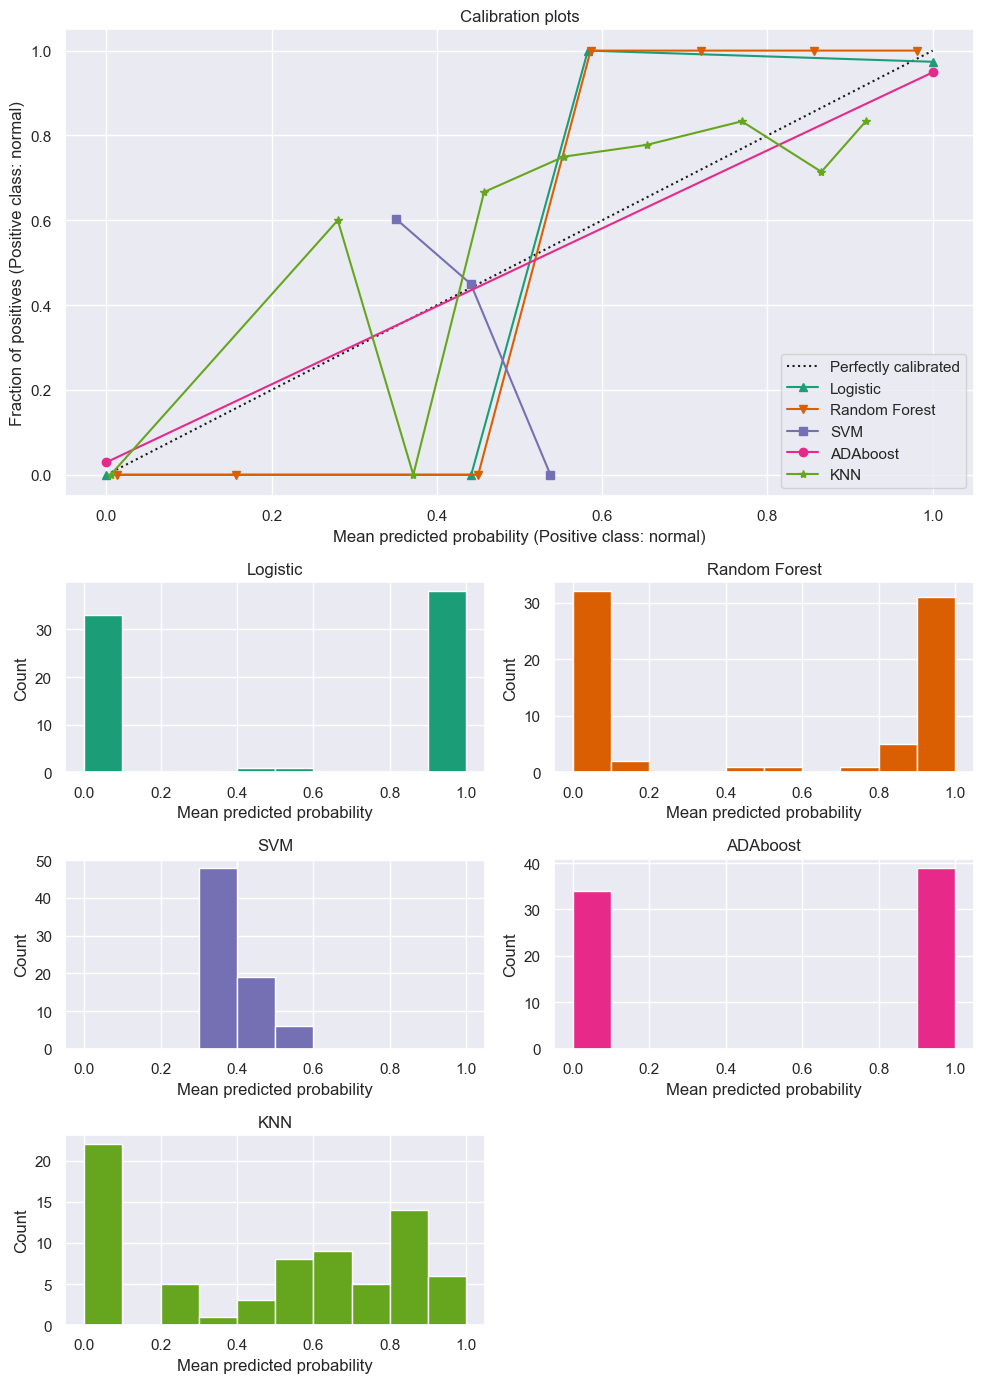

In [112]:
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay

sns.set()
fig = plt.figure(figsize=(10, 14))
gs = GridSpec(5, 2)
colors = plt.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s", "o", "*", "p"]
for i, (clf, _, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4,1)]
for i, (_, _, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()


# Multi-class

## Linear classifiers multi-class with SGD


Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Strictly speaking, SGD is merely an optimization technique and does not correspond to a specific family of machine learning models. It is only a way to train a model.


The advantages of Stochastic Gradient Descent are:

- Efficiency.

- Ease of implementation (lots of opportunities for code tuning).

The disadvantages of Stochastic Gradient Descent include:

- SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.

- SGD is sensitive to feature scaling.

We must be sure of permuting (shuffle) training data before fitting the model or use shuffle=True to shuffle after each iteration (used by default) because in these optimization algorithms, only a subset (mini-batch) of the data is used in each iteration. Shuffling ensures that each mini-batch is a random sample from the dataset, reducing the chance of biased updates and making the optimization process more stable.

SGDClassifier supports multi-class classification by combining multiple binary classifiers in a “one versus all” (OVA) scheme. For each of the classes, a binary classifier is learned that discriminates between that and all other classes. At testing time, we compute the confidence score (i.e. the signed distances to the hyperplane) for each classifier and choose the class with the highest confidence. The figure below illustrates the OVA approach on the on our dataset considering only 2 features to visualize a 2-d plot. The dashed lines represent the seven OVA classifiers; the background colors show the decision surface induced by the seven classifiers. We used deafult options for the classifiers, only to show how it works. 


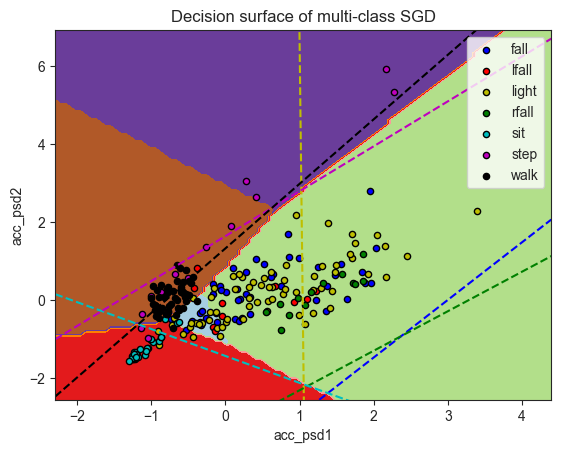

In [ ]:
# Create a mapping of class labels to integers
class_label_mapping = {label: idx for idx, label in enumerate(np.unique(y))}
# Convert class labels to integers
y_int = np.array([class_label_mapping[label] for label in y])

# Extract the features for plotting
X = df[['acc_psd1', 'acc_psd2']]  # Replace with your actual column names

# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X.iloc[idx]
y_int = y_int[idx]

# Standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y_int)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel='acc_psd1',
    ylabel='acc_psd2',  # Replace with your feature names
)
plt.axis("tight")

# Define a list of colors for each class
colors = ["b", "r", "y", "g", "c", "m", "k"]  # Add more colors as needed

# Get the unique class labels from 'y'
unique_labels = np.unique(y)

# Plot the training points for each class with actual labels
for i, color, label in zip(np.unique(y_int), colors, unique_labels):
    plt.scatter(
        X[y_int == i]['acc_psd1'],
        X[y_int == i]['acc_psd2'],
        c=color,
        label=label,  # Use actual class label from 'y'
        cmap=plt.cm.Paired,
        edgecolor="black",
        s=20,
    )
plt.title("Decision surface of multi-class SGD")
plt.axis("tight")

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)
for c, color in zip(clf.classes_, colors):
    plot_hyperplane(int(c), color)  # Convert class label to integer for indexing

# Move the legend to the top-right corner
plt.legend(loc='upper right')

plt.show()


### Classes Imbalanced

In [136]:
y = labels
y.value_counts()

light    69
walk     48
fall     47
sit      40
step     15
rfall    13
lfall    10
Name: label, dtype: int64

We collected the data in a simulated manner and have unbalanced classes, but even generally, in the real world this is a problem that will present unbalanced classes, where we have a situation where one or more classes have significantly fewer samples than others. In this case, we have to be cautious during model training and evaluation to ensure that the model doesn't just predict the majority class, so some validation technique and evaluation metric must be used to account for this. 

### Repeated Stratified K-fold Validation

Stratified k-fold cross-validation can be a valuable technique to help evaluate a model when dealing with imbalanced datasets or when certain classes have relatively fewer samples. Here's how stratified k-fold validation can help in this scenario:

- **Preserving Class Distribution**: Stratified cross-validation ensures that each fold maintains the same class distribution as the original dataset. This is crucial because it prevents any one class from being underrepresented or completely excluded from certain folds, ensuring that the model is evaluated fairly across all classes.

- **Mitigating Bias**: Without stratification, random sampling for cross-validation folds might lead to some folds containing an insufficient number of samples from minority classes. This can result in biased performance estimates, especially for those minority classes. Stratified k-fold CV mitigates this bias by ensuring that each fold is representative of the overall class distribution.

- **Robustness in Model Evaluation**: Repeated k-fold cross-validation is known for its robustness in estimating model performance. When combined with stratification, it becomes even more robust, as it repeatedly ensures that all classes are adequately represented across different folds and repetitions. This robustness is essential for making reliable decisions about model selection and hyperparameter tuning. Metrics such as precision, recall, F1-score, or area under the Receiver Operating Characteristic curve (AUC-ROC) can give a better understanding of how well the model performs, particularly for minority classes.

- **Parameter Tuning**: When tuning hyperparameters or selecting models, stratified cross-validation can help in making more informed decisions. It ensures that the model is tested and validated on different combinations of data, which is important for robust model selection.

- **Generalization**: Stratified k-fold CV helps assess how well the model generalizes to unseen data, which is crucial for real-world applications. It provides a more realistic estimate of how the model might perform when applied to new data with imbalanced class distributions.

The class SGDClassifier in Python implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification and we will try some of them.

### Mathematical formulation

Given a set of training examples $(y_i, x_i),...,(y_n,x_n)$ where $x_i \in R^m$ and $y_i \in R (y_i \in -1,1$, for classification) , our goal is to learn a linear scoring function $f(x)=w^Tx+b$ with model parameters $w \in R^m$ and intercept $b \in R$. In order to make predictions for binary classification, we simply look at the sign of $f(x)$. To find the model parameters, we minimize the regularized training error given by 
$$ E(w,b)=\frac{1}{n}\sum\limits_{i=1}^n L(y_i,f(x_i))+\alpha R(w) $$

where $L$ is a loss function that measures model (mis)fit and $R$ is a regularization term (aka penalty) that penalizes model complexity; $\alpha>0$ is a non-negative hyperparameter that controls the regularization strength. 
Different choices for entail different classifiers or regressors:

### Evaluation Metric
The main evaluation metric is the Balanced Accuracy Score (BAS). The score ranges from 0 to 1 with performance at random scoring 0.
The BAS, avoids inflated performance estimates on imbalanced datasets. The BAS is the macro-average of recall scores per class or, equivalently, raw accuracy where each sample is weighted according to the inverse prevalence of its true class. Thus for balanced datasets, the score is equal to accuracy.

In [ ]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25)

### LOGISTIC REGRESSION 

$L : Log Loss = L(y_i,f(x_i)) = log(1+exp(-y_if(x_i)))$



In [ ]:
log_preds = fit_linear_model(X_train, X_test,y_train, 'log', 'balanced_accuracy')

Best Hyperparameters: {'alpha': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
Accuracy: 0.87
Balanced Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

        fall       0.82      0.75      0.78        12
       lfall       0.20      0.50      0.29         2
       light       1.00      0.95      0.98        22
       rfall       0.00      0.00      0.00         3
         sit       1.00      1.00      1.00         8
        step       1.00      1.00      1.00         2
        walk       1.00      1.00      1.00        12

    accuracy                           0.87        61
   macro avg       0.72      0.74      0.72        61
weighted avg       0.89      0.87      0.88        61



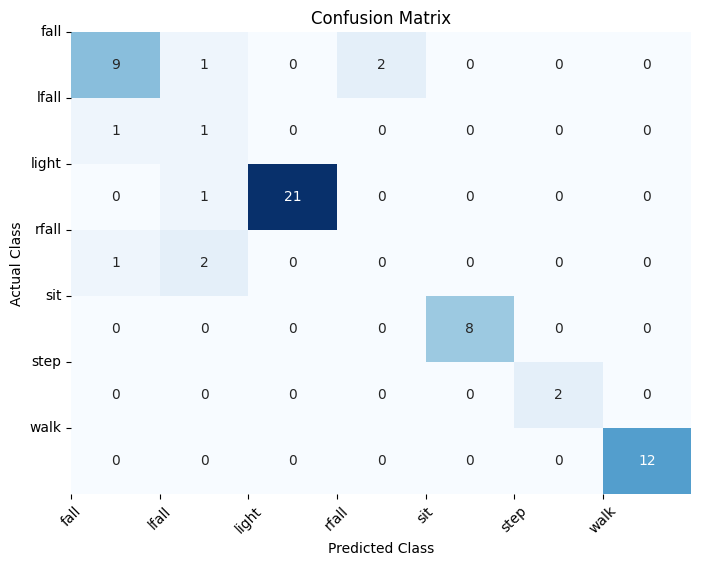

In [ ]:
show_results(y_test, log_preds)

### HINGE LOSS

$L:Hinge(soft-margin):$ equivalent to Support Vector Classification.

$L(y_i,f(x_i))= max(0,1-y_if(x_i))$

In [ ]:
hinge_preds = fit_linear_model(X_train,X_test,y_train, 'hinge', 'balanced_accuracy')

Best Hyperparameters: {'alpha': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}
Accuracy: 0.90
Balanced Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

        fall       0.83      0.83      0.83        12
       lfall       0.50      0.50      0.50         2
       light       1.00      1.00      1.00        22
       rfall       0.33      0.33      0.33         3
         sit       0.89      1.00      0.94         8
        step       1.00      1.00      1.00         2
        walk       1.00      0.92      0.96        12

    accuracy                           0.90        61
   macro avg       0.79      0.80      0.79        61
weighted avg       0.90      0.90      0.90        61



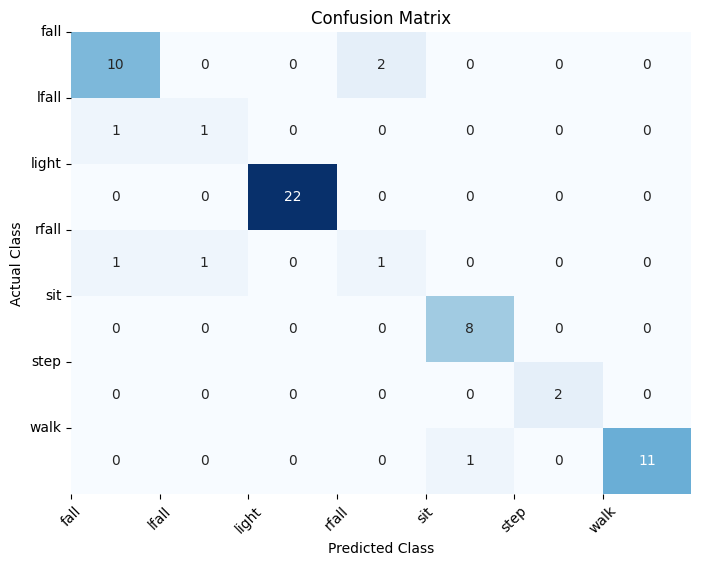

In [ ]:
show_results(y_test, hinge_preds)

### SQUARED HINGE

In [ ]:
squared_hinge = fit_linear_model(X_train,X_test,y_train, 'squared_hinge', 'balanced_accuracy')

Best Hyperparameters: {'alpha': 0.0001, 'class_weight': 'balanced', 'penalty': 'l1'}
Accuracy: 0.82
Balanced Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

        fall       0.78      0.58      0.67        12
       lfall       0.20      0.50      0.29         2
       light       1.00      0.86      0.93        22
       rfall       0.20      0.33      0.25         3
         sit       1.00      1.00      1.00         8
        step       0.67      1.00      0.80         2
        walk       1.00      1.00      1.00        12

    accuracy                           0.82        61
   macro avg       0.69      0.75      0.70        61
weighted avg       0.88      0.82      0.84        61



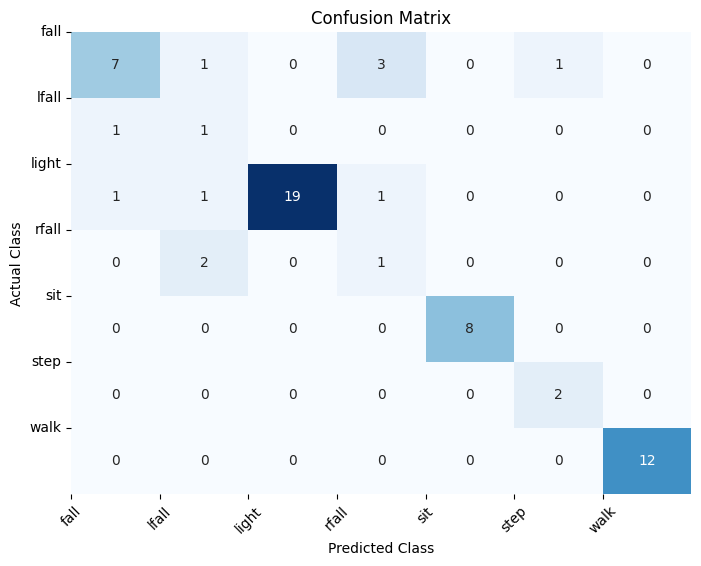

In [ ]:
show_results(y_test,squared_hinge)

### PERCEPTRON

$L: Perceptron = L(y_i,f(x_i))= max(0,-y_if(x_i))$

In [ ]:
perceptron_preds = fit_linear_model(X_train,X_test,y_train, 'perceptron', 'balanced_accuracy')

Best Hyperparameters: {'alpha': 0.0001, 'class_weight': 'balanced', 'penalty': 'l1'}
Accuracy: 0.85
Balanced Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

        fall       0.86      0.50      0.63        12
       lfall       0.25      0.50      0.33         2
       light       1.00      1.00      1.00        22
       rfall       0.25      0.33      0.29         3
         sit       1.00      1.00      1.00         8
        step       0.50      1.00      0.67         2
        walk       1.00      1.00      1.00        12

    accuracy                           0.85        61
   macro avg       0.69      0.76      0.70        61
weighted avg       0.89      0.85      0.86        61



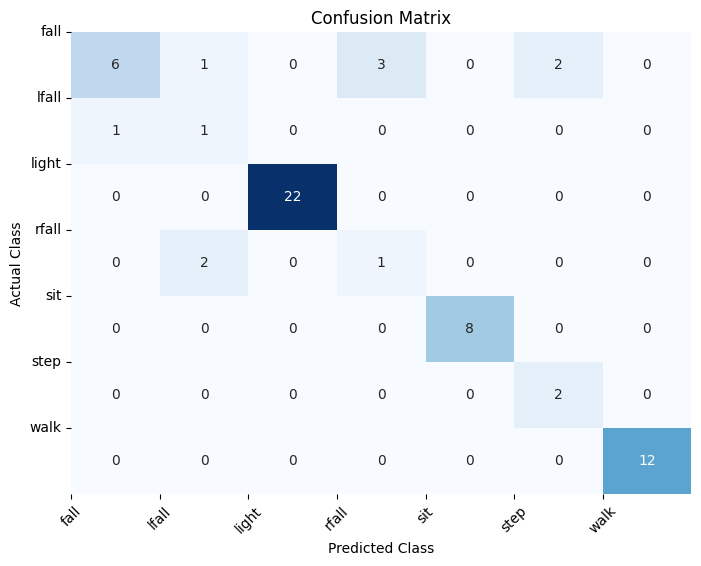

In [ ]:
show_results(y_test,perceptron_preds)

### MODFIED HUBER

$L: Modified Huber = L(y_i,f(x_i)) = max(0,1-y_if(x_i))^2 ify_if(x_i)>1,$ and $L(y_i,f(x_i)) = -4y_if(x_i))$ otherwise

In [ ]:
modified_huber_preds = fit_linear_model(X_train,X_test,y_train, 'modified_huber', 'balanced_accuracy')

Best Hyperparameters: {'alpha': 0.001, 'class_weight': 'balanced', 'penalty': 'l1'}
Accuracy: 0.82
Balanced Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

        fall       0.75      0.50      0.60        12
       lfall       0.00      0.00      0.00         2
       light       1.00      0.95      0.98        22
       rfall       0.17      0.33      0.22         3
         sit       1.00      1.00      1.00         8
        step       0.67      1.00      0.80         2
        walk       1.00      1.00      1.00        12

    accuracy                           0.82        61
   macro avg       0.65      0.68      0.66        61
weighted avg       0.87      0.82      0.84        61



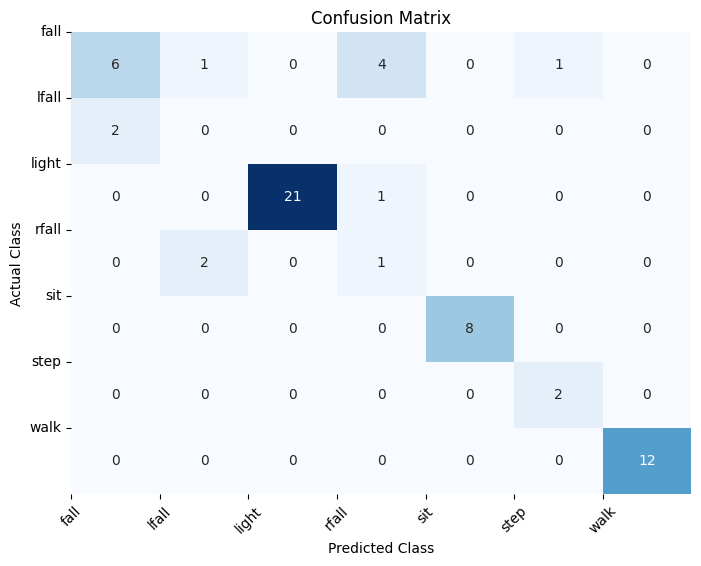

In [ ]:
show_results(y_test,modified_huber_preds)

## QDA and LDA

Both LDA and QDA can be derived from simple probabilistic models which model the class conditional distribution of the data $P(X|y=k)$ for each class k. Predictions can then be obtained by using Bayes’ rule, for each training sample $x \in R^d$:

$$P(y=k|x)=\frac{P(x|y=k)P(y=k)}{P(x)} = \frac{P(x|y=k)P(y=k)}{\sum_l P(x|y=l)*P(y=l)} $$

and we select the class which maximizes this posterior probability.

More specifically, for linear and quadratic discriminant analysis, P(x|y) is modeled as a multivariate Gaussian distribution with density:

$$P(x|y=k)= \frac{1}{(2\pi)^{d/2}|\Sigma_k|^{1/2}}\exp(-\frac{1}{2}(x-\mu_k)^t\Sigma_k^{-1}(x-\mu_k))$$

where d is the number of features.

### Quadratic discriminant analysis

According to the model above, the log of the posterior is:

$$ log P(y=k|x)= logP(x|y=k)+logP(y=k)+Cst =-\frac{1}{2}log|\Sigma_k|-\frac{1}{2}(x-\mu_k)^t\Sigma_k^{-1}(x-\mu_k)+logP(y=k)+Cst$$

where the constant term Cst corresponds to the denominator P(x), in addition to other constant terms from the Gaussian. The predicted class is the one that maximises this log-posterior.

**Relation with Gaussian Naive Bayes**

If in the QDA model one assumes that the covariance matrices are diagonal, then the inputs are assumed to be conditionally independent in each class, and the resulting classifier is equivalent to the Gaussian Naive Bayes classifier.

Best Hyperparameters: {}
Accuracy: 0.62
Balanced Accuracy: 0.34
Classification Report:
               precision    recall  f1-score   support

        fall       0.59      0.83      0.69        12
       lfall       0.00      0.00      0.00         2
       light       0.56      0.91      0.69        22
       rfall       0.00      0.00      0.00         3
         sit       0.00      0.00      0.00         8
        step       0.00      0.00      0.00         2
        walk       1.00      0.67      0.80        12

    accuracy                           0.62        61
   macro avg       0.31      0.34      0.31        61
weighted avg       0.51      0.62      0.54        61



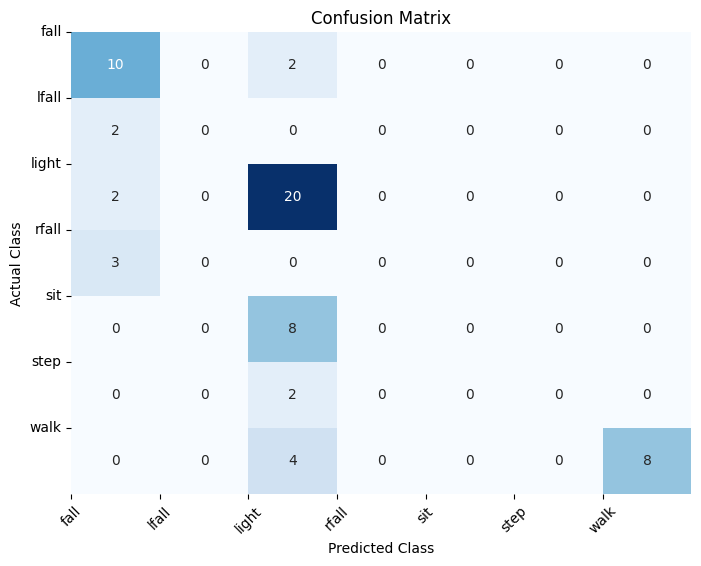

In [ ]:
# Call the function to fit and evaluate the QDA model
qda_fit = fit_qda_model(X_train,X_test, y_train, 'balanced_accuracy')

# Call the show_results function to display the evaluation metrics
show_results(y_test, qda_fit)


### Linear Discriminant Analysis

LDA is a special case of QDA, where the Gaussians for each class are assumed to share the same covariance matrix: $\Sigma_k=\Sigma$ for all k. This reduces the log posterior to:

$$logP(y=k|x)=-\frac{1}{2}(x-\mu_k)^t\Sigma^{-1}(x-\mu_k)+logP(y=k)+Cst$$

The term $(x-\mu_k)^t\sum^{-1}(x-\mu_k)$ corresponds to the Mahalanobis Distance between the sample and the mean $\mu_k$. The Mahalanobis distance tells how close $x$ is from $\mu_k$, while also accounting for the variance of each feature. We can thus interpret LDA as assigning $x$ to the class whose mean is the closest in terms of Mahalanobis distance, while also accounting for the class prior probabilities.

The log-posterior of LDA can also be written as:
$$logP(y=k|x)=\omega_k^tx+\omega_{k0}+Cst$$

where $\omega_k=\Sigma^{-1}\mu_k$ and $\omega_{k0} = -\frac{1}{2}\mu_k^t\Sigma^{-1}\mu_k+logP(y=k)$

These quantities correspond to the coef_ and intercept attributes, respectively. From the above formula, it is clear that LDA has a linear decision surface.

Assumption (A.lda): 

in each class k the joint distribution of the features is a multivariate normal centred on the mean vector $\mu_k$ , and
having a covariance matrix $\Sigma$ common to all classes, i.e.

$$X|Y=k \sim N(\mu_k ;\Sigma) \text{ for each k} = 1,2,...,K$$

Implications:

- the class conditional densities are $f_k (x) = (x;\mu_k ;\Sigma)$
- the scatter of the points in each class have elliptic-symmetric form
- since the features have covariance matrix in each class,
the assumption (A.lda) implies that in all classes the scatter of the
features has homogeneous geometric characteristics

LDA is also a 'linear classification method' because it produces linear decision boundaries. It can be shown that the LDA produces decision boundaries between classes that consist of straight lines (if p = 2), planes (p = 3), hyper-planes (when p > 3, as in our case).

Best Hyperparameters: {'shrinkage': None, 'solver': 'lsqr'}
Accuracy: 0.87
Balanced Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

        fall       0.75      0.75      0.75        12
       lfall       0.00      0.00      0.00         2
       light       1.00      0.95      0.98        22
       rfall       0.33      0.33      0.33         3
         sit       1.00      1.00      1.00         8
        step       1.00      1.00      1.00         2
        walk       1.00      1.00      1.00        12

    accuracy                           0.87        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.89      0.87      0.88        61



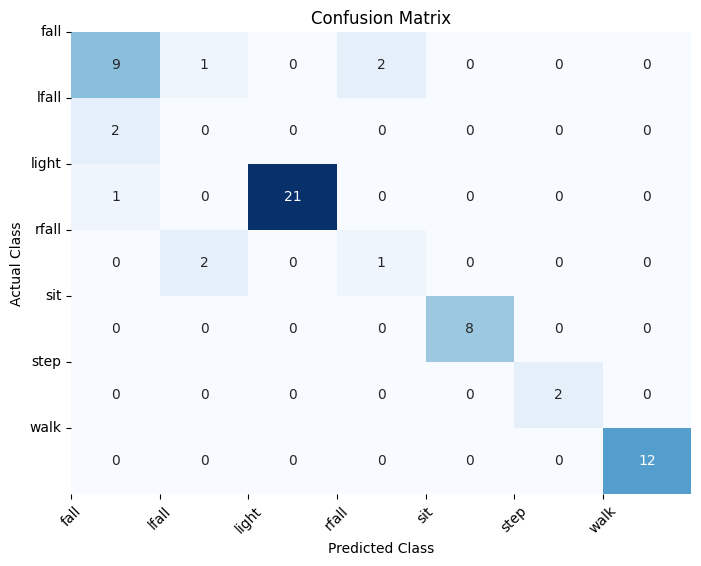

In [ ]:
# Call the function to fit and evaluate the LDA model
lda_fit = fit_lda_model(X_train,X_test, y_train, 'balanced_accuracy')

# Call the show_results function to display the evaluation metrics
show_results(y_test, lda_fit)

## Softmax regression

In [18]:
# labels
y = labels
seed = 1218
# split data 
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=seed)

# scale the features (may be useful if we are going to add other features with different scale)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float64))
X_test = scaler.fit_transform(X_test.astype(np.float64))


We simply fit of a Softmax regression since we have seven different classes that we want to predict. So we specify the "multinomial" attribute for our Scikit-learn model, and we use the "lbfgs" (Limited-memory BFGS) optimization algorithm as solver with $L_2$ default regularization

In [97]:
# softmax regression
softmax = LogisticRegression(multi_class="multinomial", solver="lbfgs")
softmax.fit(X_train, y_train)
sm_preds = softmax.predict(X_test)

accuracy_score(y_test, sm_preds)

0.9041095890410958

Let's compare our results without regularization... the model seems to not well generalize... so it is better to insist with l2 penalty (the only one "legal" in combo with our solver). 

In [98]:
softmax_nr = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty=None)
softmax_nr.fit(X_train, y_train)
sm_preds1 = softmax_nr.predict(X_test)

accuracy_score(y_test, sm_preds1)

0.821917808219178

We can try to inspect the generalization performances (approximated by a K-Fold Cross-Validation) for different values of the penalization coefficient $\lambda$ in the the Ridge Classifier. The results show that, on average, the performance in terms of accuracy is maximized relatively slow levels of penalization coefficient.

(0.0, 400.0)

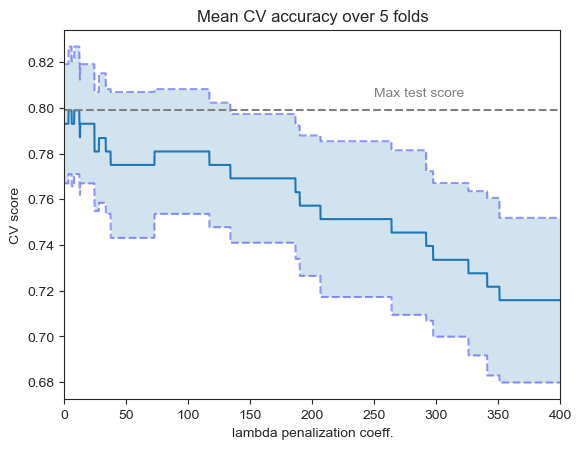

In [64]:
ridge = RidgeClassifier()

lambdas = np.linspace(0, 400, 5000)

params = [{"alpha": lambdas}]
n_folds = 5

lambda_CV = GridSearchCV(ridge, params, cv=n_folds, refit=False)
lambda_CV.fit(X_train, y_train)
scores = lambda_CV.cv_results_["mean_test_score"]
scores_std = lambda_CV.cv_results_["std_test_score"]
std_error = scores_std / np.sqrt(n_folds)

plt.plot(lambdas, scores)
plt.plot(lambdas, scores + std_error, "b--", alpha=0.4)
plt.plot(lambdas, scores - std_error, "b--", alpha=0.4)
plt.fill_between(lambdas, scores + std_error, scores - std_error, alpha=0.2)
plt.text(250, 0.805, "Max test score", color="grey")
plt.title(f'Mean CV accuracy over {n_folds} folds')
plt.ylabel("CV score")
plt.xlabel("lambda penalization coeff.")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([lambdas[0], lambdas[-1]])

With this initial analysis we may simply restrict the parameters space in which look for the best choice (combination) of parameters. Let's proceed with a Randomized Search for our linear model: we can see that with this new more accurate inspection based on the F1-score optimization (max) the penalty seems to be excluded. In this case also the optimal classifier it's a different one and, using an high number of iteration of our search, the best parameters solution "converge" to the following.

In [25]:
softmax_preds, softmax_clf = best_softmax_fit(X_train, X_test, y_train, y_test)

Best parameters: {'warm_start': False, 'solver': 'sag', 'penalty': None, 'max_iter': 50, 'fit_intercept': True, 'class_weight': None}
Accuracy:0.8691818832796276
F1-score:0.8057455414598272


From the report, we can identify what problems we need to solve to come up with a perfomorming model:

1. the training sample is small (80% of 242 total observations) and actually contains a small number of observations for each class

2. some particular types of falls are very similar or are directly mistaken for the "classic" forward fall ("fall"). Prominent is the case of the "light" fall being mistaken for a "fall."

3. in general we are not very PRECISE in identifying the forward fall as other samples of different falls take on characteristics similar to the first.

              precision    recall  f1-score   support

        fall       0.65      1.00      0.79        11
       lfall       1.00      0.50      0.67         2
       light       1.00      0.76      0.86        21
       rfall       0.50      1.00      0.67         1
         sit       1.00      0.95      0.97        19
        step       0.60      1.00      0.75         3
        walk       1.00      0.88      0.93        16

    accuracy                           0.88        73
   macro avg       0.82      0.87      0.81        73
weighted avg       0.92      0.88      0.88        73



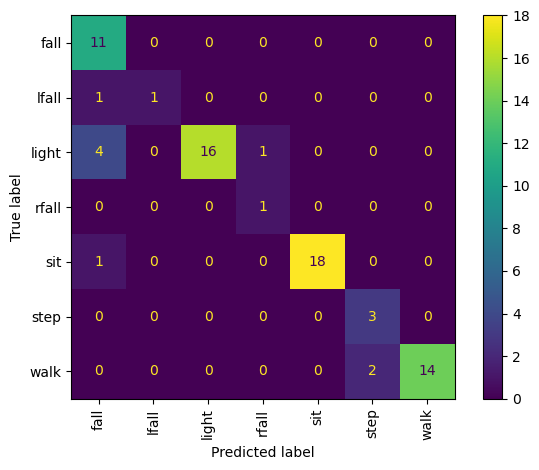

In [34]:
show_results_complete(X_test, y_test, softmax_preds, softmax_clf)

## Resampling

We try to make the data set nicer for our model, since we noticed that a probable issue could be the fact that we have a little number of samples for classes that represent the different types of fall.

In [45]:
X_train_res, X_test_res, y_train_res, y_test_res, y_res = resampling_strategy(df, labels)

As we can see from the comparison we have an unbalanced data set for some classes and this could lead to problems in classification: we do not train the model on enough examples for each label and it is quite difficult to distinguish between classes belonging to the same macro-class (i.e. fall and normal).

We then use a resampling technique called SMOTE, in particular we have selected a variant that performs over and undersampling based on clustering results. In this way we try to ensure a data set that is as balanced as possible.

**KMeans SMOTE** uses a KMeans clustering method before to apply SMOTE. The clustering will group samples together and generate new samples depending of the cluster density.

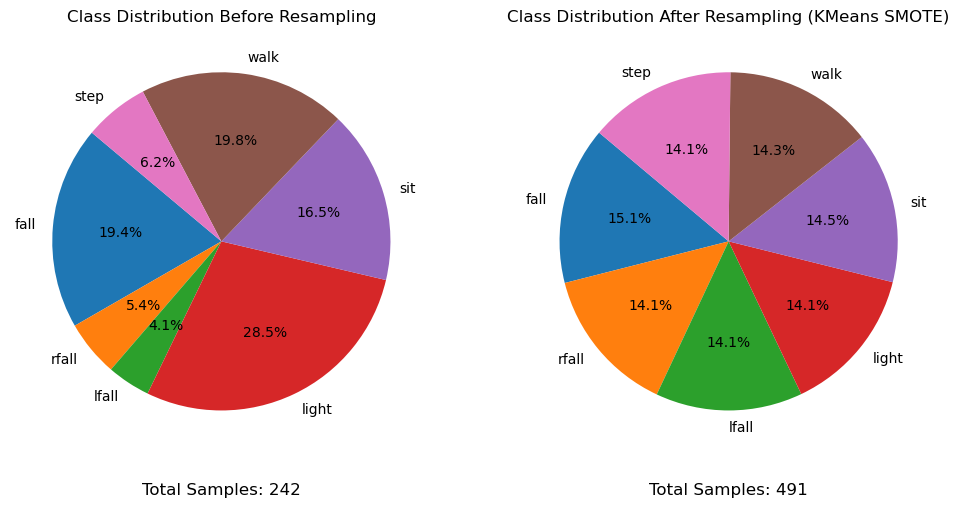

In [46]:
resampling_compare(y, y_res)

In [47]:
softmax_preds_res, softmax_clf_res = best_softmax_fit(X_train_res, X_test_res, y_train_res, y_test_res)

Best parameters: {'warm_start': False, 'solver': 'saga', 'penalty': 'l1', 'max_iter': 350, 'fit_intercept': False, 'class_weight': 'balanced'}
Accuracy:0.8901177675371225
F1-score:0.8737232222946509


              precision    recall  f1-score   support

        fall       0.89      0.67      0.76        24
       lfall       0.78      0.93      0.85        15
       light       0.96      0.74      0.84        31
       rfall       0.73      1.00      0.84        19
         sit       1.00      1.00      1.00        17
        step       0.84      0.89      0.86        18
        walk       0.92      1.00      0.96        24

    accuracy                           0.87       148
   macro avg       0.87      0.89      0.87       148
weighted avg       0.88      0.87      0.87       148



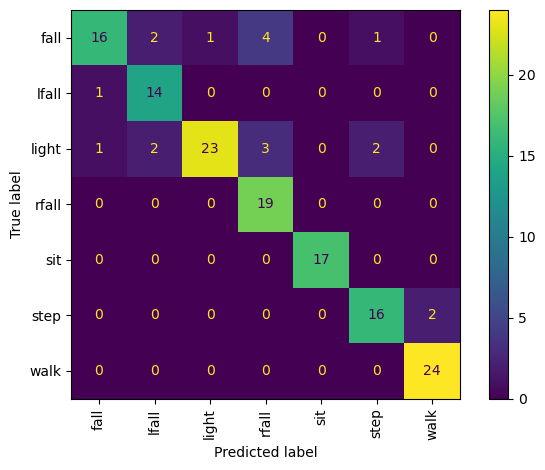

In [48]:
show_results_complete(X_test_res, y_test_res, softmax_preds_res, softmax_clf_res)

## Random Forest

In [51]:
rf_preds, rf_clf = best_rf_fit(X_train_res, X_test_res, y_train_res, y_test_res)

Best parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'entropy', 'bootstrap': False}
Accuracy:0.8918918918918919
F1-score:0.8812726587420262


The radom forest seems to perform less well than the logistic, and the misclassification error oddly concentrates on the "lfall" and "light" classes differentiating itself from the previously used linear classifier which, always saw the "light" type fall as a problem class, but lost out in the distinction between "fall" and "light."

              precision    recall  f1-score   support

        fall       0.86      0.79      0.83        24
       lfall       0.90      0.60      0.72        15
       light       0.88      0.97      0.92        31
       rfall       0.82      0.95      0.88        19
         sit       0.94      1.00      0.97        17
        step       1.00      0.83      0.91        18
        walk       0.89      1.00      0.94        24

    accuracy                           0.89       148
   macro avg       0.90      0.88      0.88       148
weighted avg       0.90      0.89      0.89       148



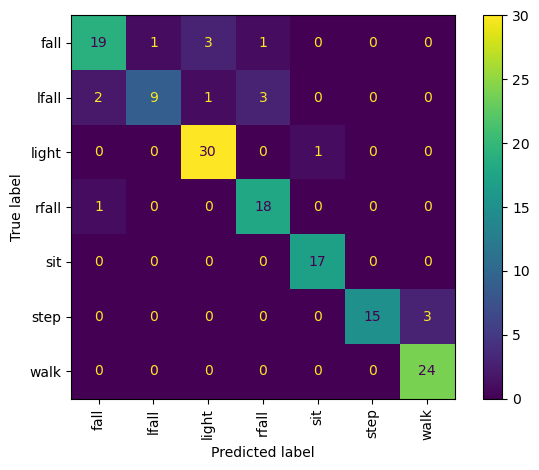

In [52]:
show_results_complete(X_test_res, y_test_res, rf_preds, rf_clf)

## Feature importance with Random Forest

The feature importance describes which features are relevant. It can help with a better understanding of the solved problem and sometimes lead to model improvement by utilizing feature selection. 

Random forest not only represents a good classification model, but also implies the evaluation of fundamental metrics for the evaluation of **feature importance**.

The **mean decrease in Gini coefficient** is a measure of how each variable contributes to the homogeneity of the nodes and leaves in the resulting random forest. The higher the value of mean decrease accuracy or mean decrease Gini score, the higher the importance of the variable in the model.

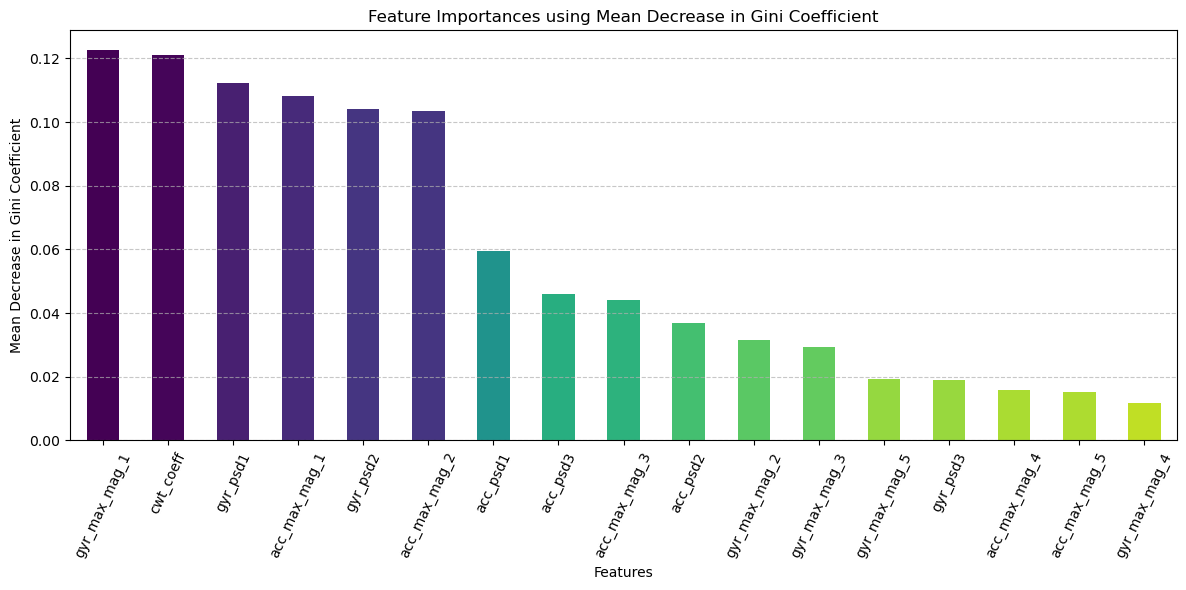

In [ ]:
feature_importances = rf_clf.feature_importances_
forest_importances = pd.Series(feature_importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)


plt.figure(figsize=(12, 6))  
colors = plt.cm.viridis_r(forest_importances / forest_importances.max())
forest_importances.plot(kind='bar', color=colors)
plt.title("Feature Importances using Mean Decrease in Gini Coefficient")
plt.xlabel("Features")
plt.ylabel("Mean Decrease in Gini Coefficient")
plt.xticks(rotation=65)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The **Mean Decrease Accuracy** plot expresses how much accuracy the model losses by excluding each variable. The more the accuracy suffers, the more important the variable is for the successful classification. The variables are presented from descending importance.

To evaluate the Feature importance according to the Mean Decrease Accuracy we use the Permutation Importance algorithm implemented in sklearn.

**The Algorithm**:
> __Inputs__: fitted predictive model $m$, tabular dataset (training or validation) $D$;

> Compute the reference score $s$ of the model $m$ on data $D$ (in this case the accuracy of the classifier without a specific feature)

> For each feature $j$ (column of $D$):

>- For each repetition k in 1,...,$K$:
    >>* randomly shuffle column $j$ to generate a corrupted version of the data named $\hat{D}_{k,j}$
    >>* compute the score $s_{k,j}$ of model $m$ on corrupted data $\hat{D}_{k,j}$

>- Compute the importance $i_j$ for feature $f_j$ defined as: $$i_j = s - \frac{1}{K} \sum_{k=1}^{K} s_{k,j}$$



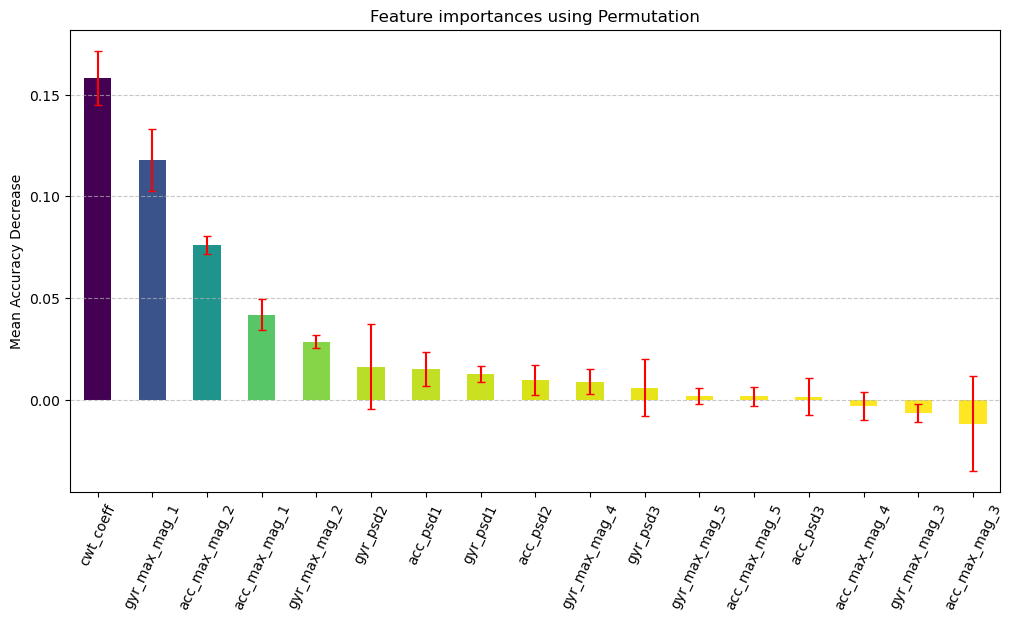

In [110]:
result = permutation_importance(
    rf_clf, X_test_res, y_test_res, n_repeats=40, random_state=42, n_jobs=-1
)
feature_names = df.columns

forest_importances = pd.Series(result.importances_mean, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis_r(forest_importances / forest_importances.max())
plt.errorbar(forest_importances.index, forest_importances, yerr=result.importances_std, 
             fmt='none', ecolor='red', capsize=3)
forest_importances.plot(kind='bar', color=colors)
plt.title("Feature importances using Permutation")
plt.ylabel("Mean Accuracy Decrease")
plt.xticks(rotation=65)
plt.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()

Before plotting these results regarding the importance of the features we believed it might be very informative to introduce more power spectrum peaks at low frequencies. Apparently, however, we had to change our minds by identifying other attributes as critical factors for classification.

## Multicollinearity check

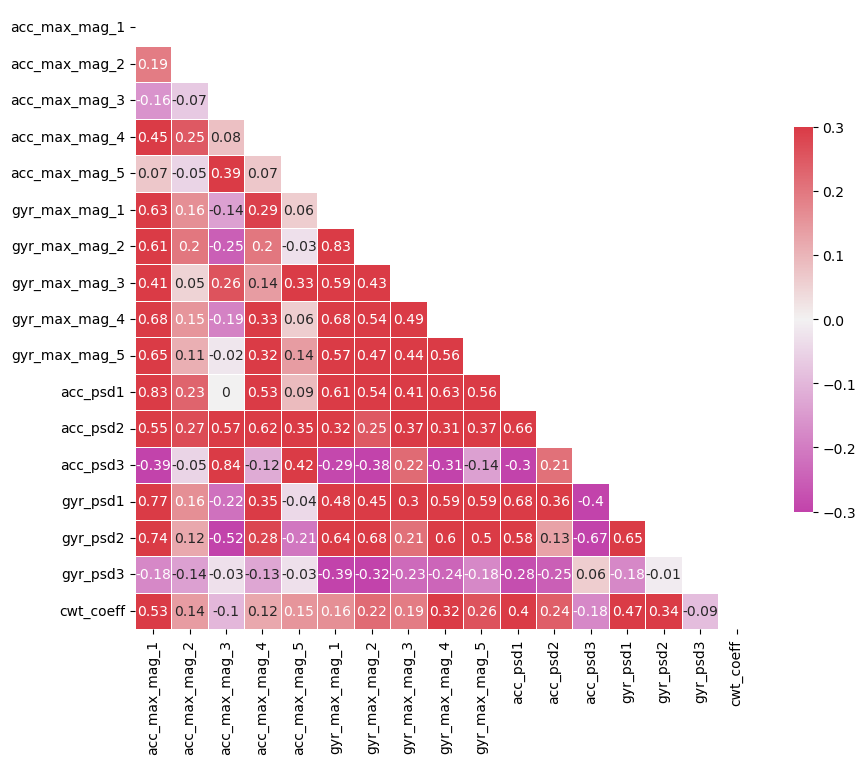

In [77]:
plt.figure(figsize=(10, 10))  
corr=round(df.corr(),2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(680, 10, as_cmap=True)

sns.heatmap(corr, mask=mask,cmap=cmap, annot=True,vmax=.3,vmin=-.3,center=0,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}  
)
plt.show()

In [111]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
vif_data_sort=vif_data.sort_values(by=['VIF'], ascending=False)

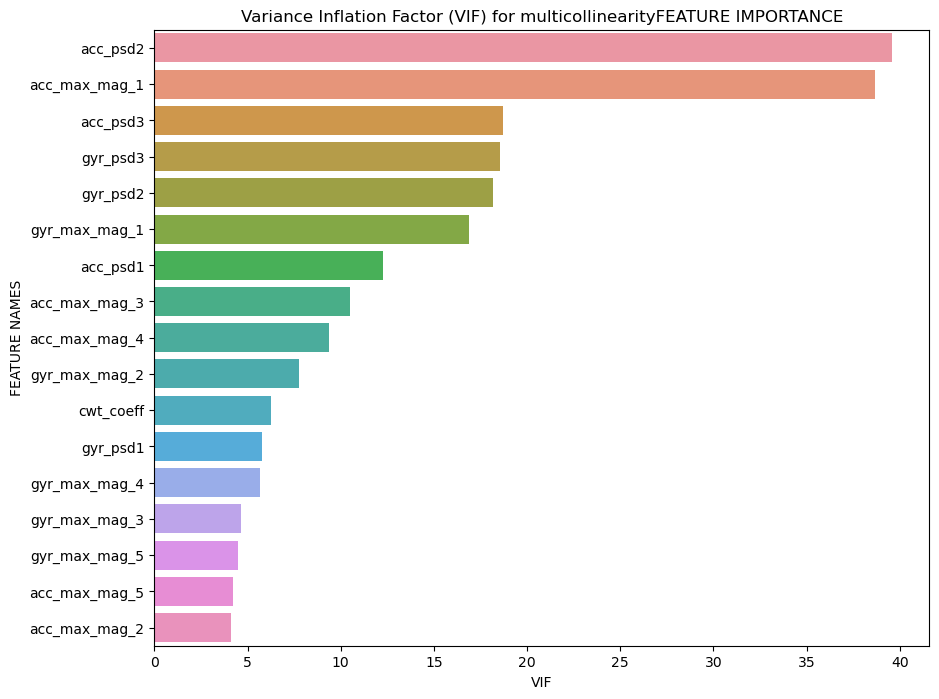

In [112]:
plot_feature_importance(vif_data_sort['VIF'],vif_data_sort['feature'],'Variance Inflation Factor (VIF) for multicollinearity')

## Unsupervised Learing 

In this section of our project we will investigate about the similarities of our observation using unsupervised methods.\
The main idea is to highlight 'overlapping' among different labels in order to be alble to collapse some classes in one, gaining a deeper understanding of the underlying structure in the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from tqdm import tqdm
from yellowbrick.cluster import SilhouetteVisualizer
from matplotlib.colors import ListedColormap
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn_extra.cluster import KMedoids

In [ ]:
#divide the target from the independet variables of the data
labels = data["label"]
features = data.drop("label", axis=1)
# scale the features (may be useful if we are going to add other features with different scale)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features.astype(np.float64))


Using a dimensionality reduction like PCA basically we want to reduce our dataset in order to be able to visualize it at maximum in three dimensional space.\
After a standard scaler of our data as  $z= \frac{x_i-\mu}{\sigma} $ we are searching for the best trade of in terms of number of dimensions and explained variance of the components. 

In [ ]:
#Let's fit PCA
pca = PCA().fit(features_scaled)
#display the percentage of total variance explained by each principal component#
print(f'Summing up the explained variance of the first three components we have the ',round(sum(pca.explained_variance_ratio_[0:3])*100,0),'% of explained variance.')


Summing up the explained variance of the first three components we have the  65.0 % of explained variance.


Please notice that this is not a theoretically correct choice since the components we are using explain little variance from what we would like. However, since the scree plot suggest an elbow with componets=3 and due to the fact that we want to visualise our data we will choose the first three components and perform an unsupervised analysis on them.

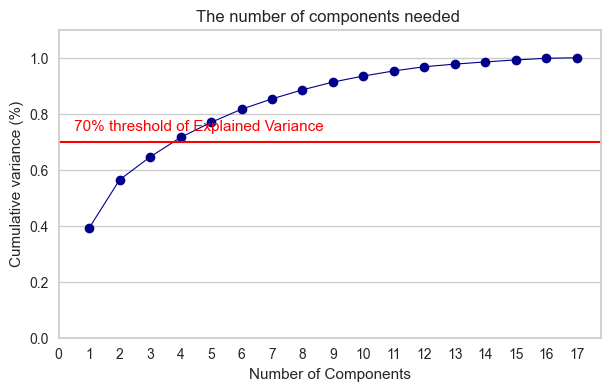

In [ ]:
#Let's show how the explained Variance change as Number of components change
plt.rcParams["figure.figsize"] = (7,4)
fig, ax = plt.subplots()
xi = np.arange(1, 18, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='-', color='darkblue',linewidth=0.8)

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 18, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed ')

plt.axhline(y=0.70, color='red', linestyle='-',linewidth=1.5)
plt.text(0.5, 0.74, '70% threshold of Explained Variance', color = 'red', fontsize=11)

ax.grid(axis='x')
plt.show()

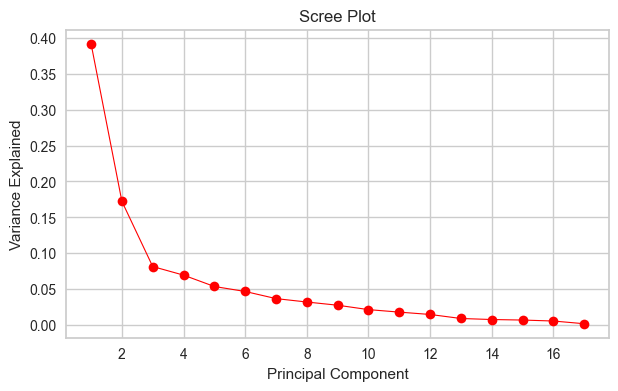

In [ ]:
#Scree Plot
PC = np.arange(pca.n_components_) + 1
plt.plot(PC, pca.explained_variance_ratio_, 'o-', linewidth=0.8, color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
#The two plots above show us that the 'optimal' number of principal component 
pca__ = PCA(n_components=3)
principalComponents = pca__.fit_transform(features_scaled)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2',
                                      'principal component 3'])

principalDf

principal component 1  principal component 2  principal component 3
0                 0.718814              -1.373015               1.328855
1                 1.877130              -1.517292               0.899578
2                 2.351676              -0.934841               0.189648
3                 2.931982              -0.427801               0.668167
4                 3.997960               1.425515               3.004232
..                     ...                    ...                    ...
237               1.388331              -0.863729              -1.330790
238               0.984035              -1.364963              -0.453162
239               1.389996              -1.071779              -0.303490
240               0.242474              -1.339003              -0.472494
241               0.517637              -1.056588              -0.281040

[242 rows x 3 columns]

In [ ]:
#Let's display the explained variance by each component
print(f'The explained variance total is equal to:',round(sum(pca__.explained_variance_ratio_),2))

The explained variance total is equal to: 0.65


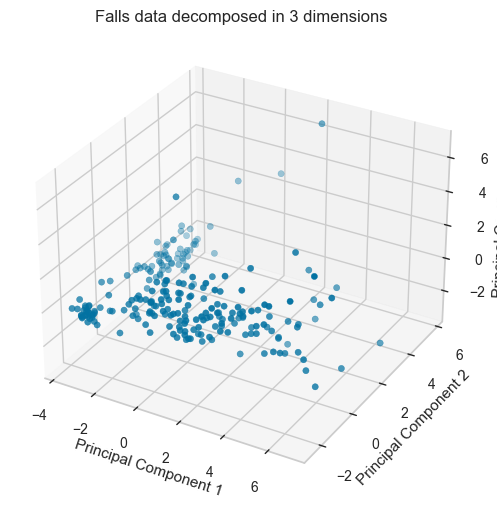

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract the principal components from the DataFrame
x = principalDf['principal component 1']
y = principalDf['principal component 2']
z = principalDf['principal component 3']

# Plot the data points
ax.scatter(x, y, z, c='b', marker='o')

# Set labels for the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Set the title for the plot
ax.set_title('Falls data decomposed in 3 dimensions')

# Show the plot
plt.show()

In order to choose the correct number of centroids by elbow method we will use YellowBrick that is a powerful tool that allows us to use a silhouette coefficient as metric to compute the intra-cluster variance, in order to choose the best value for $k$.\
in the sepcific the Silhouette Coefficient method is a method of interpretation and validation of consistency within clusters of data. We will have a graphical representation of how well each object has been classified. The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters.
$$
S(i)=\frac{b(i)-a(i)}{\max \{a(i), b(i)\}}
$$

where:\
$\Longrightarrow b(i)$ is the smallest average distance of point $i$ to all points in any other cluster\
$\Longrightarrow a(i)$ is the average distance of $\mathrm{i}$ from all other points in its cluster 

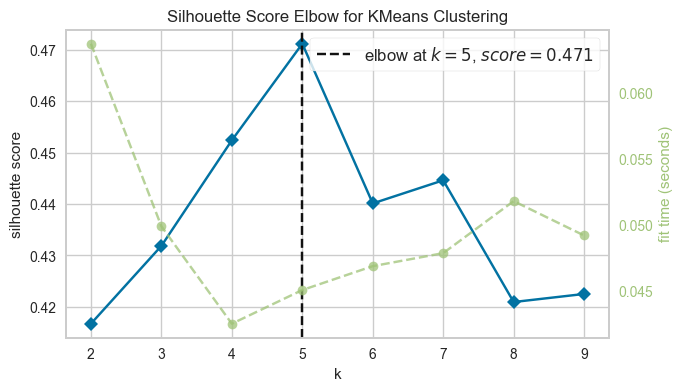

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# k is range of number of clusters.
model= KMeans()
visualizer = KElbowVisualizer(model,  k=(2,10), metric='silhouette', timings= True)
visualizer.fit(principalDf)
visualizer.show()

In [ ]:
principalDf

principal component 1  principal component 2  principal component 3
0                 0.718814              -1.373015               1.328855
1                 1.877130              -1.517292               0.899578
2                 2.351676              -0.934841               0.189648
3                 2.931982              -0.427801               0.668167
4                 3.997960               1.425515               3.004232
..                     ...                    ...                    ...
237               1.388331              -0.863729              -1.330790
238               0.984035              -1.364963              -0.453162
239               1.389996              -1.071779              -0.303490
240               0.242474              -1.339003              -0.472494
241               0.517637              -1.056588              -0.281040

[242 rows x 3 columns]

In [ ]:
for k in tqdm(range(3,7)):
    kmeans=KMeans(n_clusters=k, init='k-means++',n_init=1000,tol=1e-5, random_state=42)
    kmeans.fit(principalDf)
    principalDf[f'Clusters{k}']=kmeans.labels_
    
principalDf['labels'] = labels

principalDf

100%|██████████| 4/4 [00:17<00:00,  4.33s/it]


principal component 1  principal component 2  principal component 3  \
0                 0.718814              -1.373015               1.328855   
1                 1.877130              -1.517292               0.899578   
2                 2.351676              -0.934841               0.189648   
3                 2.931982              -0.427801               0.668167   
4                 3.997960               1.425515               3.004232   
..                     ...                    ...                    ...   
237               1.388331              -0.863729              -1.330790   
238               0.984035              -1.364963              -0.453162   
239               1.389996              -1.071779              -0.303490   
240               0.242474              -1.339003              -0.472494   
241               0.517637              -1.056588              -0.281040   

     Clusters3  Clusters4  Clusters5  Clusters6 labels  
0            0          0          1          1   fall  
1            1          0          1          5   fall  
2            1          0          1          5   fall  
3            1          2          2          3   fall  
4            1          2          2          3   fall  
..         ...        ...        ...        ...    ...  
237          1          0          1          5  light  
238          0          0          1          1  light  
239          1          0          1          5  light  
240          0          0          1          1  light  
241          0          0          1          1  light  

[242 rows x 8 columns]

Let's try to investigate about the distributuon of fall types in each cluster

In [ ]:
clus5 = principalDf.iloc[:, [5, 7]]
clus3 = principalDf.iloc[:, [3, 7]]
clus4 = principalDf.iloc[:, [4, 7]]
clus6 = principalDf.iloc[:, [6, 7]]
distribution_6 = clus6.groupby("Clusters6")["labels"].value_counts(normalize=True).unstack(fill_value=0).mul(100).round(2)
distribution_5 = clus5.groupby("Clusters5")["labels"].value_counts(normalize=True).unstack(fill_value=0).mul(100).round(2)
distribution_4 = clus4.groupby("Clusters4")["labels"].value_counts(normalize=True).unstack(fill_value=0).mul(100).round(2)
distribution_3 = clus3.groupby("Clusters3")["labels"].value_counts(normalize=True).unstack(fill_value=0).mul(100).round(2)

distribution_3

labels      fall  lfall  light  rfall   sit   step   walk
Clusters3                                                
0          24.00   5.00  22.00   4.00  40.0   4.00   1.00
1          27.38   5.95  55.95  10.71   0.0   0.00   0.00
2           0.00   0.00   0.00   0.00   0.0  18.97  81.03

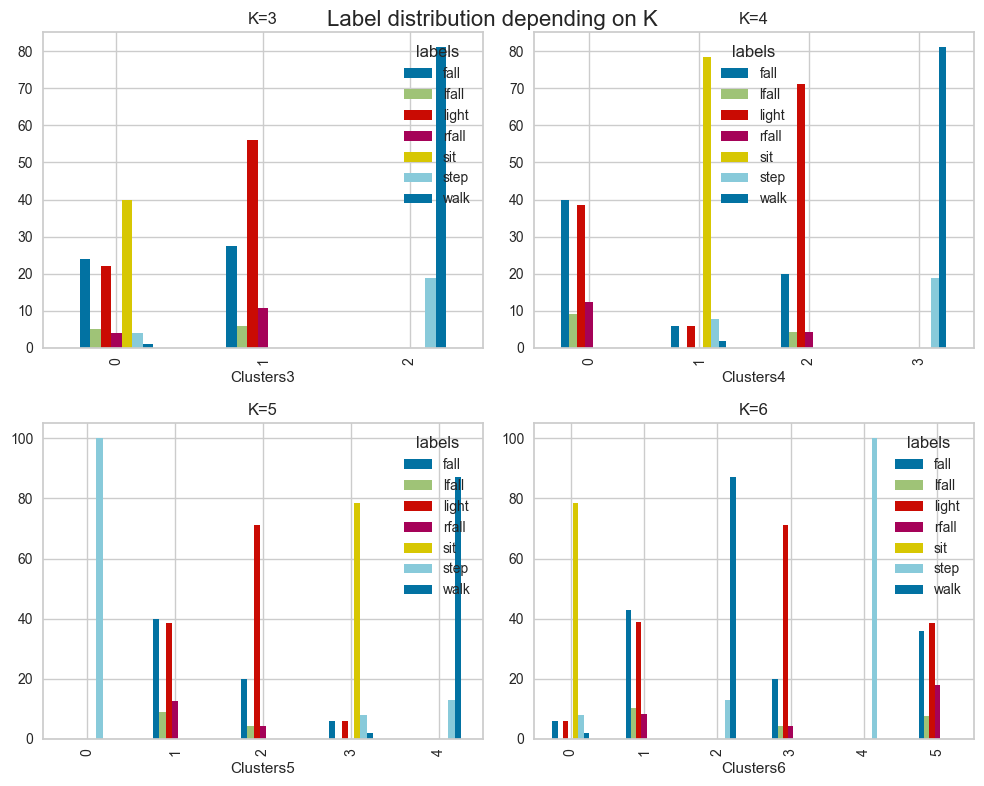

In [ ]:
# Create a 2x2 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the first distribution in the top-left subplot
distribution_3.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('K=3')

# Plot the second distribution in the top-right subplot
distribution_4.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('K=4')

# Plot the third distribution in the bottom-left subplot
distribution_5.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('K=5')

# Plot the fourth distribution in the bottom-right subplot
distribution_6.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('K=6')

# Adjust spacing between subplots
plt.tight_layout()
fig.suptitle('Label distribution depending on K', fontsize=16)
# Display the plots
plt.show()


We can clearly see, also from the distribution table below, how the clusters are variegated, in particular notice how, also increasing at $k=6$ the number of centroids labels like $fall$ and $light$ are distribuited very similar in all the clusters.\
 This is a symptom of a clear overlapping of the labels of these observations, which are too similar to be classified correctly. Specifically in the collection in our data these observations were very similar so we decide to collapse them into a single label $fall$. In any case we can investigate what is the best value for $k$ applying some test like Calinski Harabasz score as follow in the following lines of code.

In [ ]:
distribution_3

labels      fall  lfall  light  rfall   sit   step   walk
Clusters3                                                
0          24.00   5.00  22.00   4.00  40.0   4.00   1.00
1          27.38   5.95  55.95  10.71   0.0   0.00   0.00
2           0.00   0.00   0.00   0.00   0.0  18.97  81.03

In [ ]:
distribution_4

labels      fall  lfall  light  rfall    sit   step   walk
Clusters4                                                 
0          39.77   9.09  38.64  12.50   0.00   0.00   0.00
1           5.88   0.00   5.88   0.00  78.43   7.84   1.96
2          20.00   4.44  71.11   4.44   0.00   0.00   0.00
3           0.00   0.00   0.00   0.00   0.00  18.97  81.03

In [ ]:
distribution_5

labels      fall  lfall  light  rfall    sit    step   walk
Clusters5                                                  
0           0.00   0.00   0.00   0.00   0.00  100.00   0.00
1          39.77   9.09  38.64  12.50   0.00    0.00   0.00
2          20.00   4.44  71.11   4.44   0.00    0.00   0.00
3           5.88   0.00   5.88   0.00  78.43    7.84   1.96
4           0.00   0.00   0.00   0.00   0.00   12.96  87.04

In [ ]:
distribution_6

labels      fall  lfall  light  rfall    sit    step   walk
Clusters6                                                  
0           5.88   0.00   5.88   0.00  78.43    7.84   1.96
1          42.86  10.20  38.78   8.16   0.00    0.00   0.00
2           0.00   0.00   0.00   0.00   0.00   12.96  87.04
3          20.00   4.44  71.11   4.44   0.00    0.00   0.00
4           0.00   0.00   0.00   0.00   0.00  100.00   0.00
5          35.90   7.69  38.46  17.95   0.00    0.00   0.00

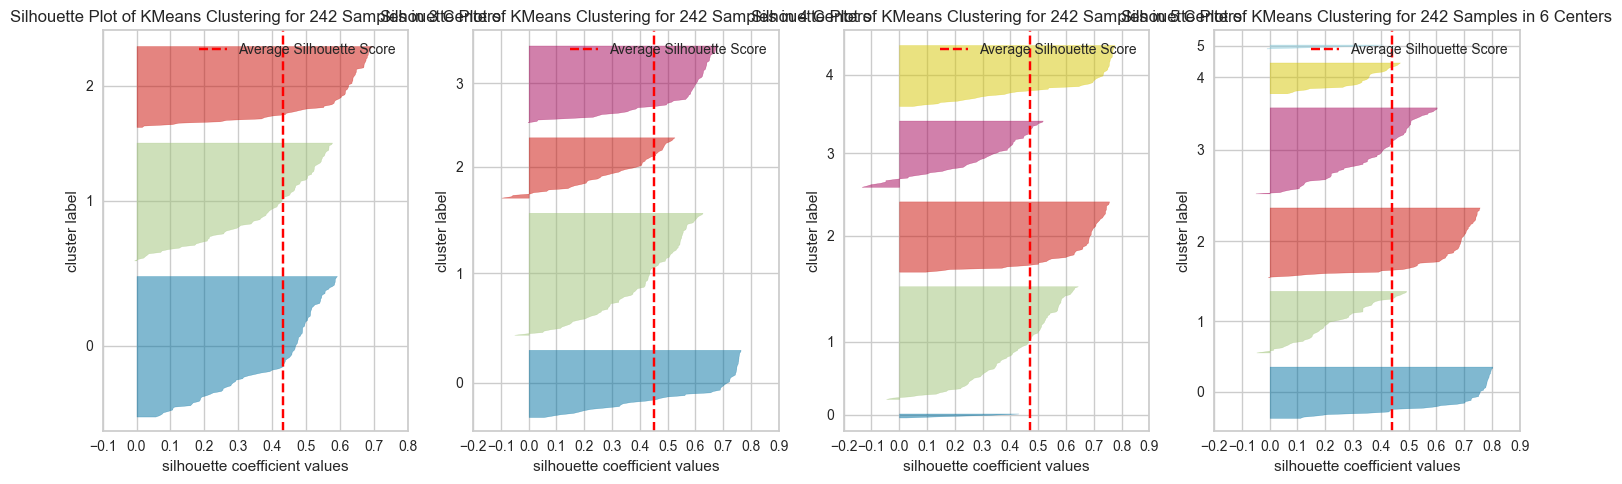

In [ ]:
# Define the range of K values
k_values = [3, 4, 5, 6]

# Create subplots for the silhouette plots
fig, axs = plt.subplots(1, len(k_values), figsize=(15, 5))

for i, k in enumerate(k_values):
    model = KMeans(n_clusters=k, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axs[i])
    
    # Fit the data to the visualizer
    visualizer.fit(principalDf.iloc[:, 0:3])
    
    axs[i].set_title(f'K = {k}')
    visualizer.finalize()

plt.tight_layout()
plt.show()

We tried to use less but "more important" features but the results seems to not really improve...

Best parameters: {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'log_loss', 'bootstrap': True}
Accuracy:0.8986486486486487
F1-score:0.901968778590205
              precision    recall  f1-score   support

        fall       0.94      0.67      0.78        24
       lfall       1.00      0.87      0.93        15
       light       0.88      0.94      0.91        31
       rfall       0.79      1.00      0.88        19
         sit       1.00      1.00      1.00        17
        step       1.00      0.83      0.91        18
        walk       0.83      1.00      0.91        24

    accuracy                           0.90       148
   macro avg       0.92      0.90      0.90       148
weighted avg       0.91      0.90      0.90       148



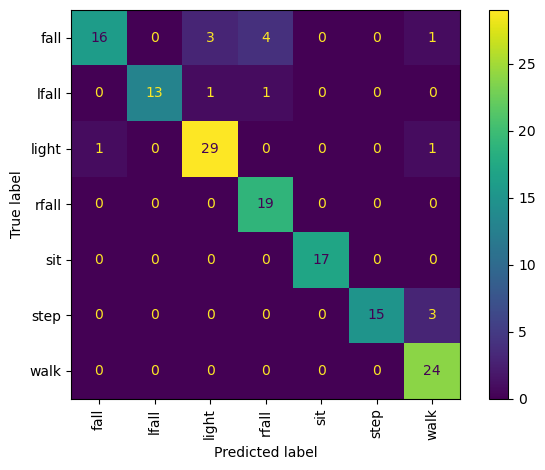

Total pipeline computation time:0.33 seconds.


In [56]:
# select the best features
df_fi = df[["acc_max_mag_1", "gyr_max_mag_1","acc_max_mag_2", "gyr_max_mag_2", "cwt_coeff", "acc_psd1", "gyr_psd1"]]

start = time.time()
X_train_res_fi, X_test_res_fi, y_train_res_fi, y_test_res_fi, _ = resampling_strategy(df_fi, labels)
end = time.time()

rf_preds_fi, rf_clf_fi = best_rf_fit(X_train_res_fi, X_test_res_fi, y_train_res_fi, y_test_res_fi)
show_results_complete(X_test_res_fi, y_test_res_fi, rf_preds_fi, rf_clf_fi)

print(f'Total pipeline computation time:{round(end-start,2)} seconds.')


### Calinski Harabasz score


*Calinski-Harabasz* method in unsupervised learning is also called *the variance ratio criterion (VRC)*. The idea is that well-defined clusters have a large between-cluster variance and a small within-cluster variance so the optimal number of clusters corresponds to the solution with the highest Calinski-Harabasz index value.\
This score attempts to measure how separate the clusters are from each other and how compact they are within each cluster. In general, a higher Calinski-Harabasz score indicates better clustering quality.
$$
C H(k)=\frac{B(k)}{W(k)} \cdot \frac{n-k}{k-1}
$$
where:
$
\begin{aligned}
& \Longrightarrow B(k)=\text { between cluster variation } \\
& \Longrightarrow W(k)=\text { within cluster variation } \\
& \Longrightarrow n=\# \text { data point } \\
& \Longrightarrow k=\# \text { clusters }
\end{aligned}
$

In [ ]:
X = principalDf.iloc[:,0:3]
labels5 = principalDf.Clusters5
score6 = calinski_harabasz_score(X,principalDf.Clusters6)
score5 = calinski_harabasz_score(X, labels5)
score4 = calinski_harabasz_score(X, principalDf.Clusters4)
score3= calinski_harabasz_score(X, principalDf.Clusters3)

# Stampa il punteggio
print("Calinski-Harabasz Score: K=3 is", score3), print("Calinski-Harabasz Score: K=4 is", score4),print("Calinski-Harabasz Score: K=5 is", score5), print("Calinski-Harabasz Score: K=6 is", score6)  



Calinski-Harabasz Score: K=3 is 211.42731832056356
Calinski-Harabasz Score: K=4 is 238.61057042585645
Calinski-Harabasz Score: K=5 is 229.36008197203824
Calinski-Harabasz Score: K=6 is 212.09626196339414


(None, None, None, None)

The optimal number of clusters choose by Calin ski-Harabasz criterio is four different from the elbow method previously implemented that suggested $k=5$. Let's try to visualize the data points clusterized in 3D:

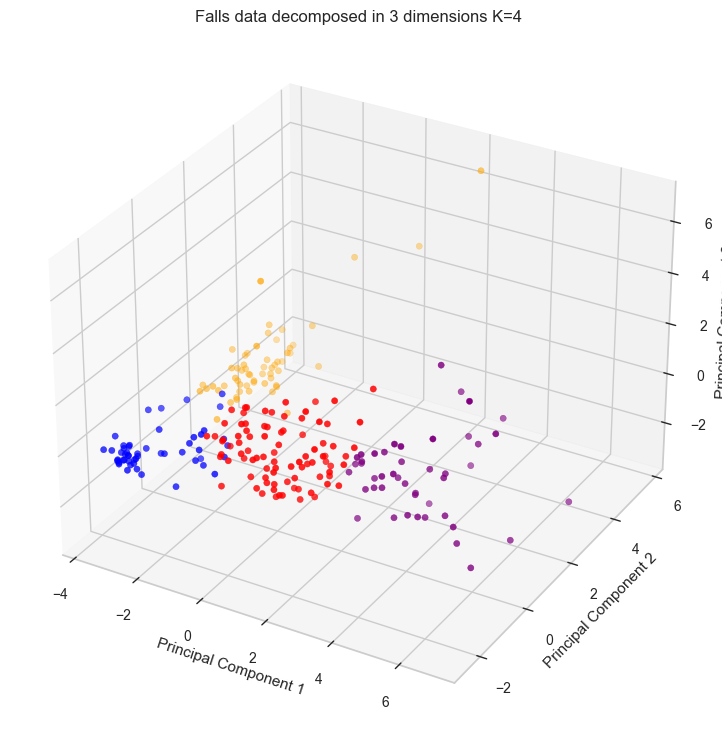

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(9, 11))
ax = fig.add_subplot(111, projection='3d')
custom_cmap = ListedColormap(['red', 'blue', 'green', 'purple', 'orange'])

# Extract the principal components from the DataFrame
x = principalDf['principal component 1']
y = principalDf['principal component 2']
z = principalDf['principal component 3']

# Plot the data points
ax.scatter(x, y, z, c= principalDf.Clusters4,  cmap=custom_cmap , marker='o')

# Set labels for the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Set the title for the plot
ax.set_title('Falls data decomposed in 3 dimensions K=4')

# Show the plot
plt.show()

<!-- By the way, using K-Means procedure is appropriate when the dissimilarity measure is taken to be squared Euclidean distance $D(x_i,x_i')$. \
When we use squared Euclidean distance we are placing the highest influence on
the *largest distances*.

This causes the procedure to lack robustness against
outliers that produce very large distances and in our case the '*outliers*' observations are the most important, they may be symptom of an abrupt fall or change in the accelerometer (or gyroscope) detector and a distorted measurement of these distances could create problems in the clustering of these ouliers observations wrt 'mean' observation.\
The only part of the K-means algorithm that assumes squared Euclidean distance is the minimization step ;\
The cluster representatives $\left\{m_1, \ldots, m_K\right\}$  are taken to be the means of the currently assigned clusters. The algorithm can be generalized for use with arbitrarily defined dissimilarities $D\left(x_i, x_{i^{\prime}}\right)$ by replacing this step by an explicit optimization with respect to $\left\{m_1, \ldots, m_K\right\}$.\
 In the most common form, centers for each cluster are restricted to be one of the observations assigned to the cluster, and not the average.\
To do so, however, comes at the price of a computationally more expensive procedure ($K_{medoids}$ is in the order of $O_N^2$).\
Due to the fact that we have a small set of data coming from our collection we don't care about this kind of computation cost to pay. -->

## Collapsing uninformative classes

In [59]:
# Mapping for relabeling
label_mapping = {
    'fall' :'fall',
    'rfall': 'rfall',
    'lfall': 'lfall',
    'light': 'fall', # only collapse "light" and "fall" classes
    'sit': 'sit',
    'walk': 'walk',
    'step': 'step'
}

# Replace existing labels with new labels
df_new['label'] = labels
df_new['label'] = df_new['label'].map(label_mapping)

y_new = df_new["label"]
df_new = df_new.drop("label", axis=1)

In [61]:
X_train_res, X_test_res, y_train_res, y_test_res, _ = resampling_strategy(df_new, y_new)

In [62]:
# SOFTMAX
softmax_preds, softmax_clf = best_softmax_fit(X_train_res, X_test_res, y_train_res, y_test_res)

Best parameters: {'warm_start': False, 'solver': 'lbfgs', 'penalty': None, 'max_iter': 50, 'fit_intercept': True, 'class_weight': 'balanced'}
Accuracy:0.9311619311619311
F1-score:0.9219374158011832


It seems that, using the same algorithm and the same resampling technique to balance classes, the overall performances improve of the ~4% both in terms of accuracy and f1 score simply collapsing the two most similar classes

              precision    recall  f1-score   support

        fall       0.96      0.64      0.77        39
       lfall       0.80      0.95      0.86        37
       rfall       0.84      1.00      0.91        26
         sit       1.00      1.00      1.00        35
        step       1.00      1.00      1.00        38
        walk       0.97      1.00      0.99        35

    accuracy                           0.92       210
   macro avg       0.93      0.93      0.92       210
weighted avg       0.93      0.92      0.92       210



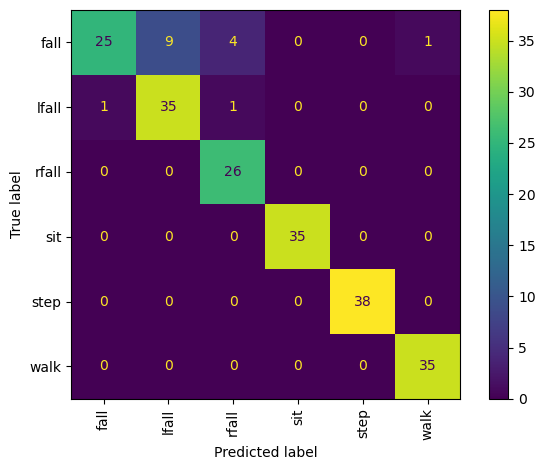

In [64]:
show_results_complete(X_test_res, y_test_res, softmax_preds, softmax_clf)

## Final model selection

Best parameters: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': None, 'criterion': 'log_loss', 'bootstrap': True}
Accuracy:0.9809523809523809
F1-score:0.9811586968819673
              precision    recall  f1-score   support

        fall       0.93      1.00      0.96        39
       lfall       1.00      0.89      0.94        37
       rfall       0.96      1.00      0.98        26
         sit       1.00      1.00      1.00        35
        step       1.00      1.00      1.00        38
        walk       1.00      1.00      1.00        35

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



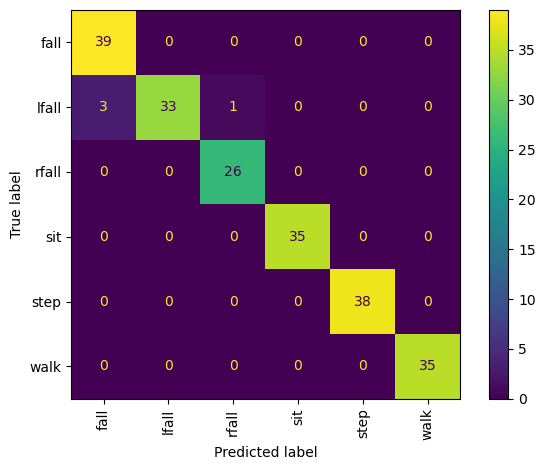

In [65]:
rf_preds, rf_clf = best_rf_fit(X_train_res, X_test_res, y_train_res, y_test_res)
show_results_complete(X_test_res, y_test_res, rf_preds, rf_clf)

Best parameters: {'shrinking': True, 'kernel': 'rbf', 'degree': 8, 'decision_function_shape': 'ovr', 'break_ties': True, 'C': 2}
Accuracy:0.9809523809523809
F1-score:0.9804557930486498
              precision    recall  f1-score   support

        fall       0.95      0.97      0.96        39
       lfall       1.00      0.92      0.96        37
       rfall       0.93      1.00      0.96        26
         sit       1.00      1.00      1.00        35
        step       1.00      1.00      1.00        38
        walk       1.00      1.00      1.00        35

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



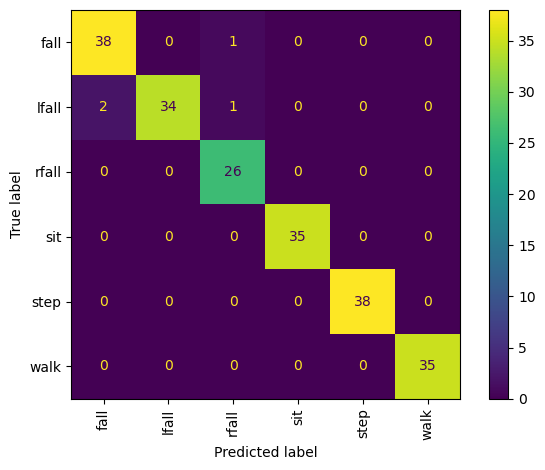

In [68]:
svm_preds, svm_clf = best_svm_fit(X_train_res, X_test_res, y_train_res, y_test_res)
show_results_complete(X_test_res, y_test_res, svm_preds, svm_clf)

In [77]:
le = LabelEncoder()
le.fit(y_train_res.unique())
y_tr = le.transform(y_train_res)
y_te = le.transform(y_test_res)

xgb_preds, xgb_clf = best_svm_fit(X_train_res, X_test_res, y_tr, y_te)
#show_results_complete(X_test_res, y_te, xgb_preds, xgb_clf)

Best parameters: {'shrinking': True, 'kernel': 'rbf', 'degree': 4, 'decision_function_shape': 'ovo', 'break_ties': False, 'C': 2}
Accuracy:0.9809523809523809
F1-score:0.9804557930486498


Best parameters: {'p': 2, 'n_neighbors': 5, 'leaf_size': 150, 'algorithm': 'ball_tree'}
Accuracy:0.9238095238095239
F1-score:0.9223360914733164
              precision    recall  f1-score   support

        fall       0.97      0.74      0.84        39
       lfall       0.87      0.92      0.89        37
       rfall       0.79      1.00      0.88        26
         sit       0.97      1.00      0.99        35
        step       0.97      0.95      0.96        38
        walk       0.97      0.97      0.97        35

    accuracy                           0.92       210
   macro avg       0.92      0.93      0.92       210
weighted avg       0.93      0.92      0.92       210



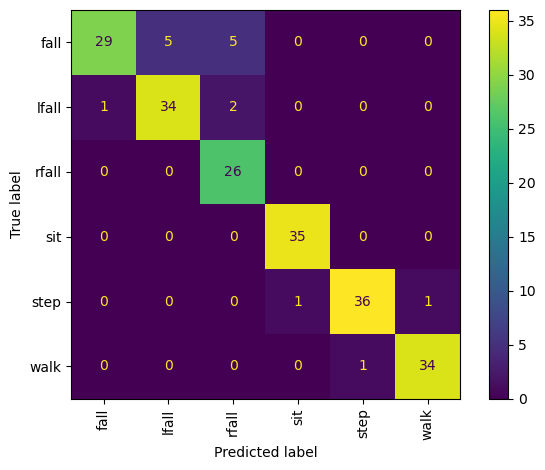

In [84]:
# KNN
knn_preds, knn_clf = best_knn_fit(X_train_res, X_test_res, y_train_res, y_test_res)
show_results_complete(X_test_res, y_test_res, knn_preds, knn_clf)

Best parameters: {'n_estimators': 140, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}
Accuracy:0.9285714285714286
F1-score:0.9278056152899051
              precision    recall  f1-score   support

        fall       0.78      1.00      0.88        39
       lfall       1.00      0.65      0.79        37
       rfall       0.90      1.00      0.95        26
         sit       1.00      0.97      0.99        35
        step       1.00      0.97      0.99        38
        walk       0.97      1.00      0.99        35

    accuracy                           0.93       210
   macro avg       0.94      0.93      0.93       210
weighted avg       0.94      0.93      0.93       210



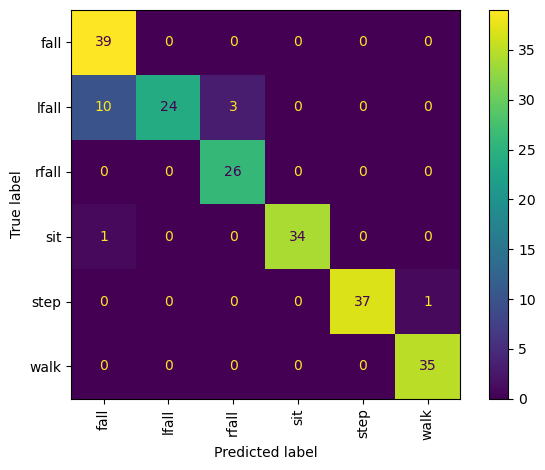

In [82]:
# ADA BOOST
ada_preds, ada_clf = best_ada_fit(X_train_res, X_test_res, y_train_res, y_test_res)
show_results_complete(X_test_res, y_test_res, ada_preds, ada_clf)

Best parameters: {'warm_start': True, 'shuffle': False, 'penalty': 'elasticnet', 'n_iter_no_change': 45, 'max_iter': 3600, 'fit_intercept': True, 'early_stopping': False, 'alpha': 0.0001}
Accuracy:0.9333333333333333
F1-score:0.9352263366127856
              precision    recall  f1-score   support

        fall       0.94      0.82      0.88        39
       lfall       0.90      0.95      0.92        37
       rfall       0.93      1.00      0.96        26
         sit       1.00      1.00      1.00        35
        step       1.00      0.87      0.93        38
        walk       0.85      1.00      0.92        35

    accuracy                           0.93       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.94      0.93      0.93       210



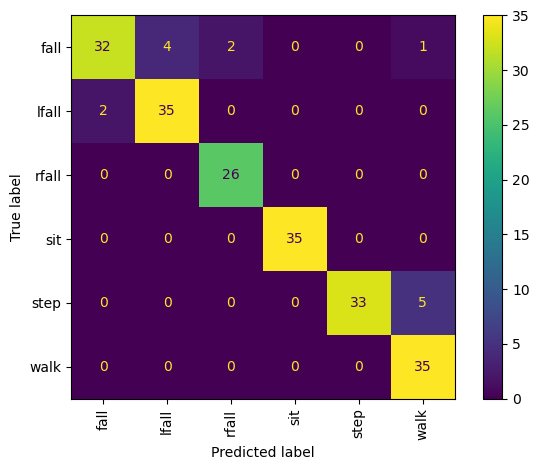

In [86]:
# PERCEPTRON
perc_preds, perc_clf = best_perc_fit(X_train_res, X_test_res, y_train_res, y_test_res)
show_results_complete(X_test_res, y_test_res, perc_preds, perc_clf)

# Definitive pipeline

              precision    recall  f1-score   support

        fall       0.95      0.95      0.95        39
       lfall       1.00      0.92      0.96        37
       rfall       0.90      1.00      0.95        26
         sit       1.00      1.00      1.00        35
        step       1.00      1.00      1.00        38
        walk       1.00      1.00      1.00        35

    accuracy                           0.98       210
   macro avg       0.97      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



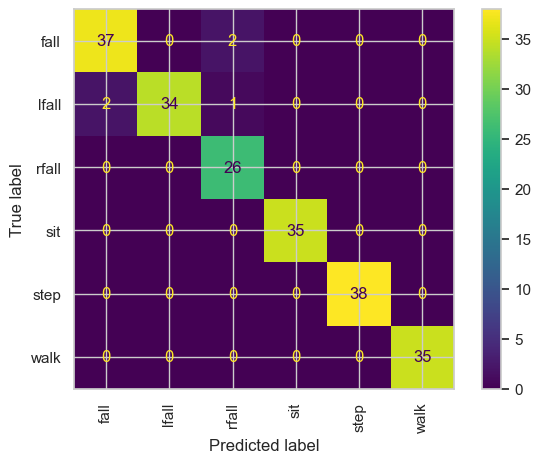

In [140]:
clf = create_fit_pipeline(data)